<a href="https://colab.research.google.com/github/Chaos-6/azure-intelligent-edge-patterns/blob/master/RC_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dtale

In [ ]:
import pandas as pd
import numpy as np
import dtale
import dtale.app as dtale_app


In [26]:
#dtale argument and open
dtale_app.USE_COLAB = True
df = pd.read_csv('satisfaction.csv')
import dtale.global_state as global_state
global_state.set_chart_settings({'scatter_points': 150000, '3d_points': 40000})
dtale.show(df)

https://xfsy4qyx7mi-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/9

**EDA**

D-Tale opens a browser window. The overall dataframe has 129880 rows and 24 columns. Only Arrival Delay in Minutes has missing values (393). Consider these for dropping in feature engineering. 

Below is an example of the same code it uses, in this example a describe() of the 'Gender' column. Depending on your browser, there may be a syntax error. Please look at the dtale tab that was opened to follow along.

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

# main statistics
stats = df['id'].describe().to_frame().T
# sum
stats['sum'] = df['id'].sum()
# median
stats['median'] = df['id'].median()
# mode
mode = df['id'].mode().values
stats['mode'] = np.nan if len(mode) > 1 else mode[0]
# var
stats['var'] = df['id'].var()
# sem
stats['sem'] = df['id'].sem()
uniq_vals = data['id'].value_counts().sort_values(ascending=False)
uniq_vals.index.name = 'value'
uniq_vals.name = 'count'
uniq_vals = uniq_vals.reset_index()
uniq_vals.loc[:, 'type'] = 'int64'
sequential_diffs = data['id'].diff()
diff = diff[diff == diff]
min_diff = sequential_diffs.min()
max_diff = sequential_diffs.max()
avg_diff = sequential_diffs.mean()
diff_vals = sequential_diffs.value_counts().sort_values(ascending=False)


Let's look at gender.

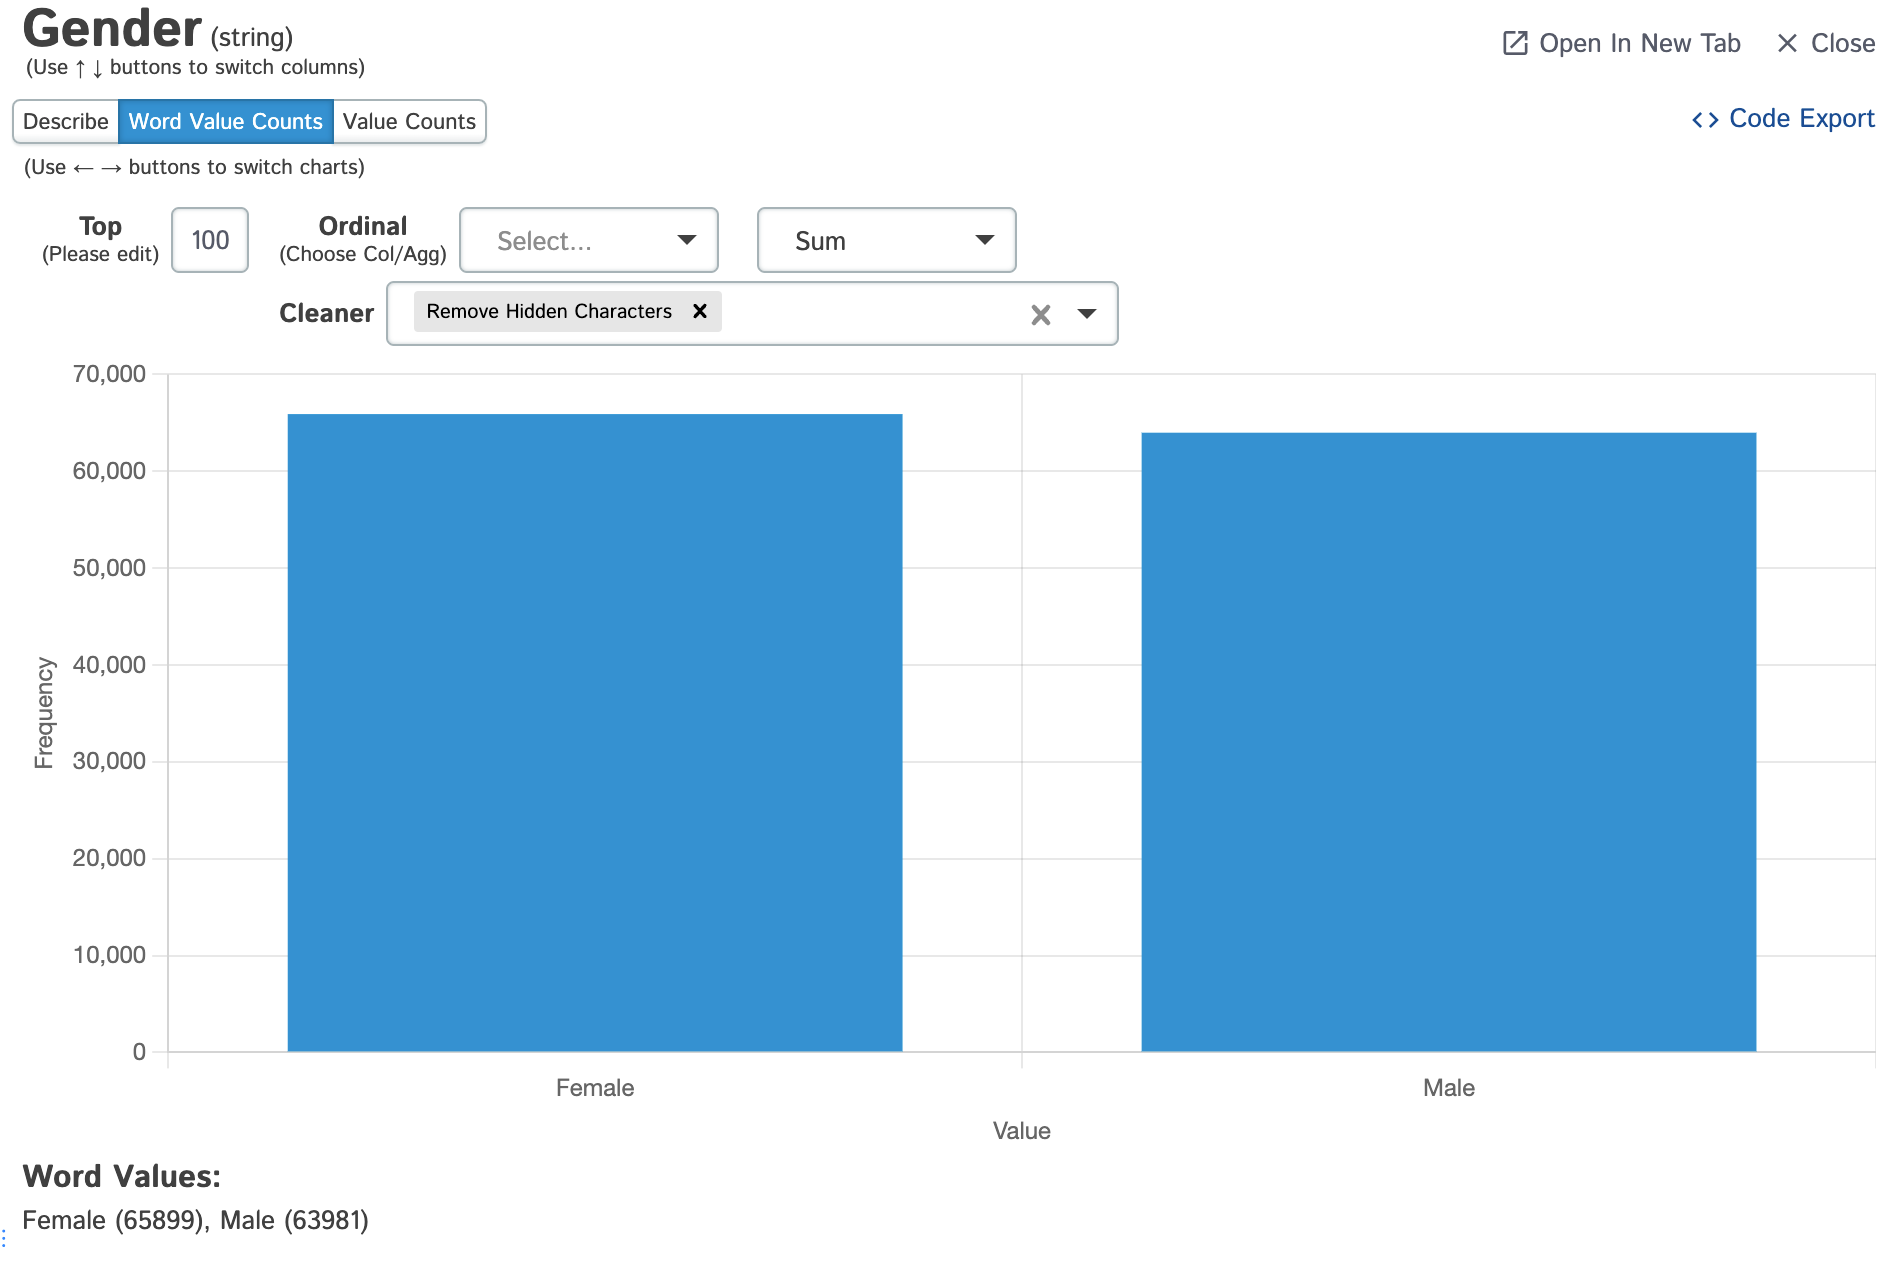

There is parity in gender.

Lets look at the other customer attributes.

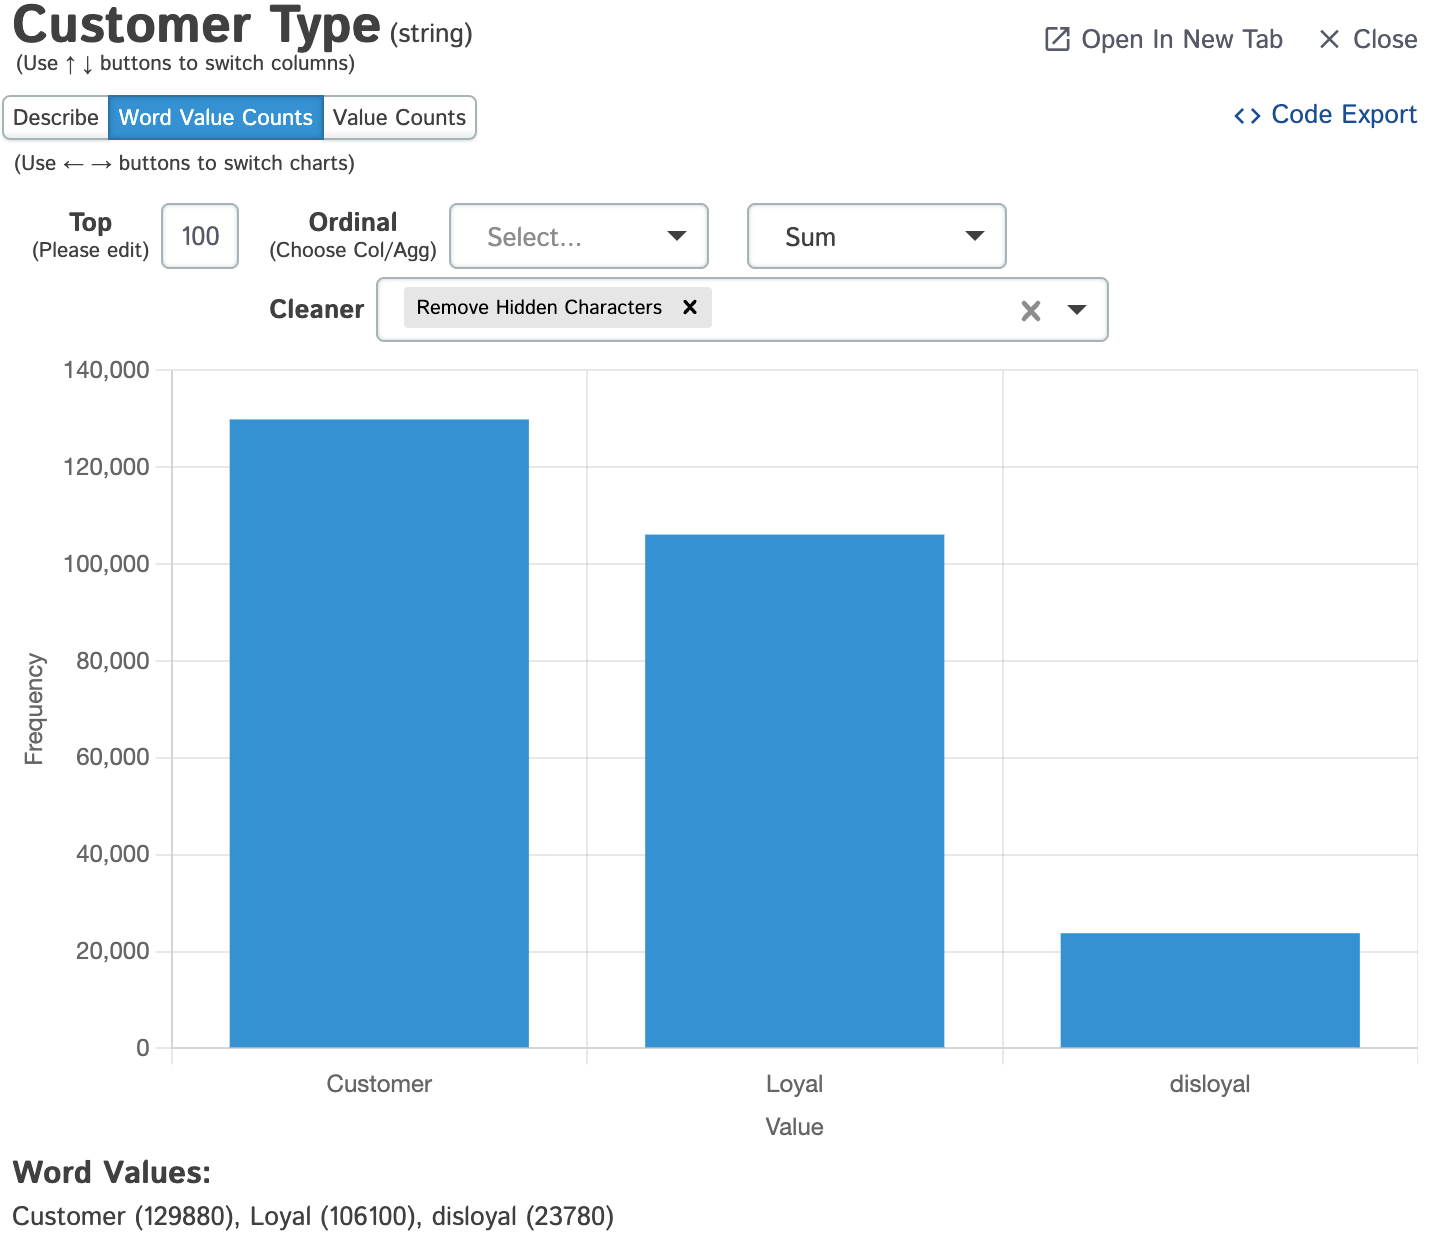

Disloyal customers are about one sixth of the population. 

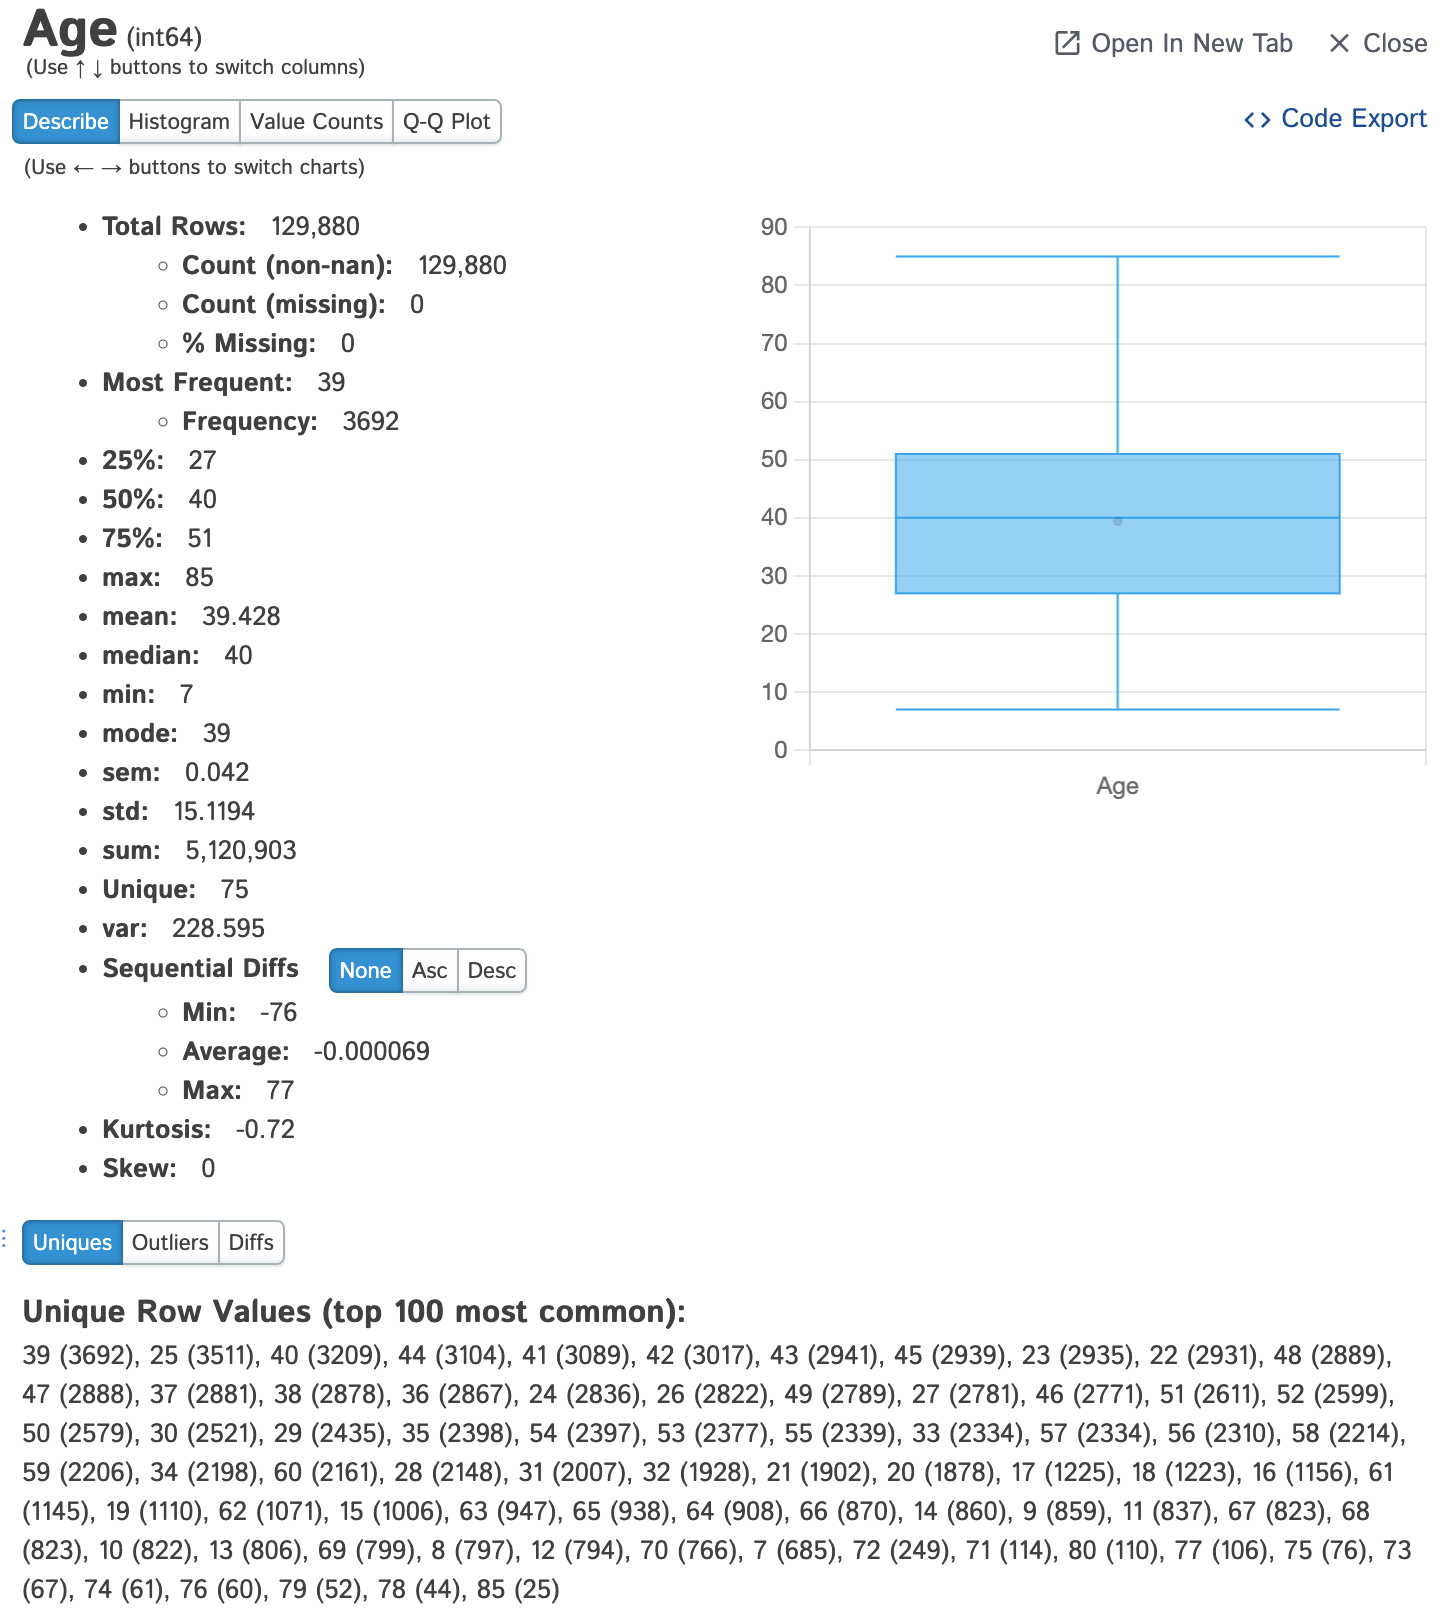

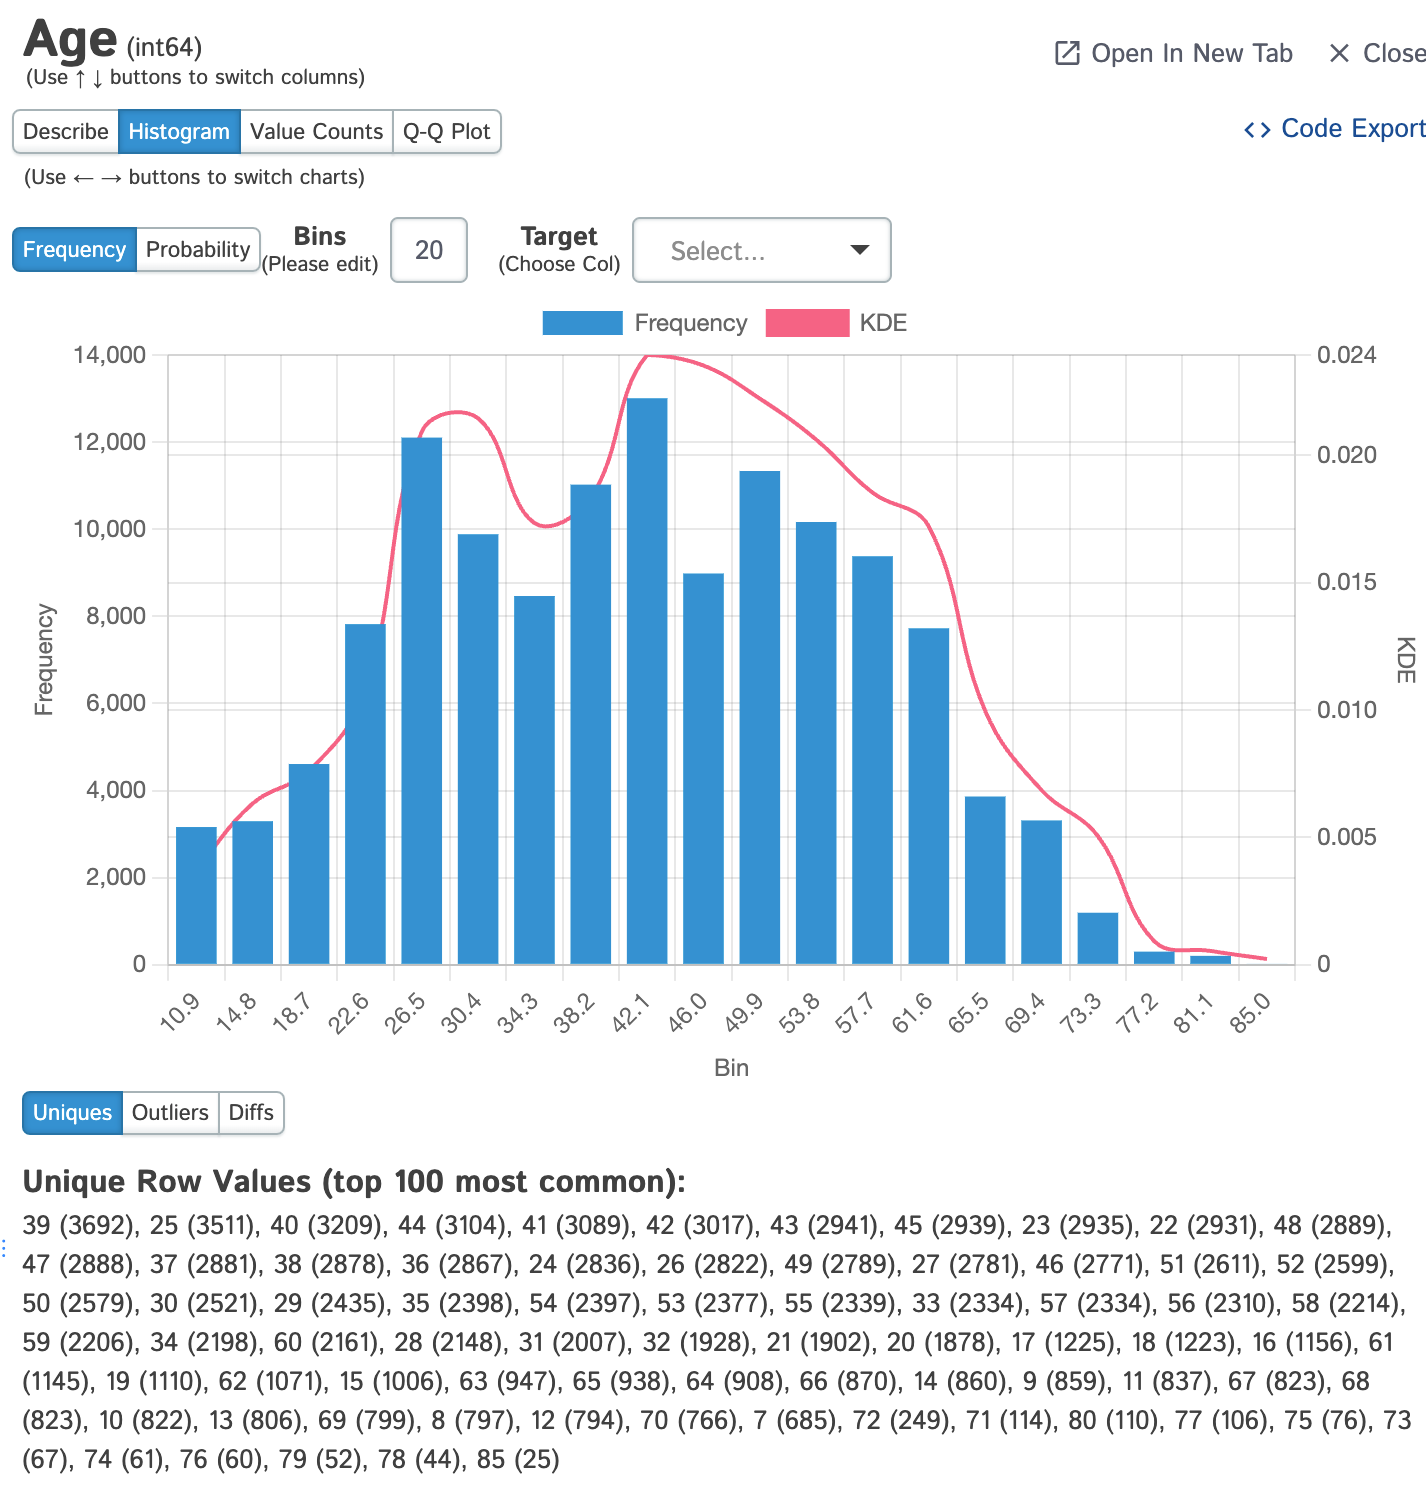

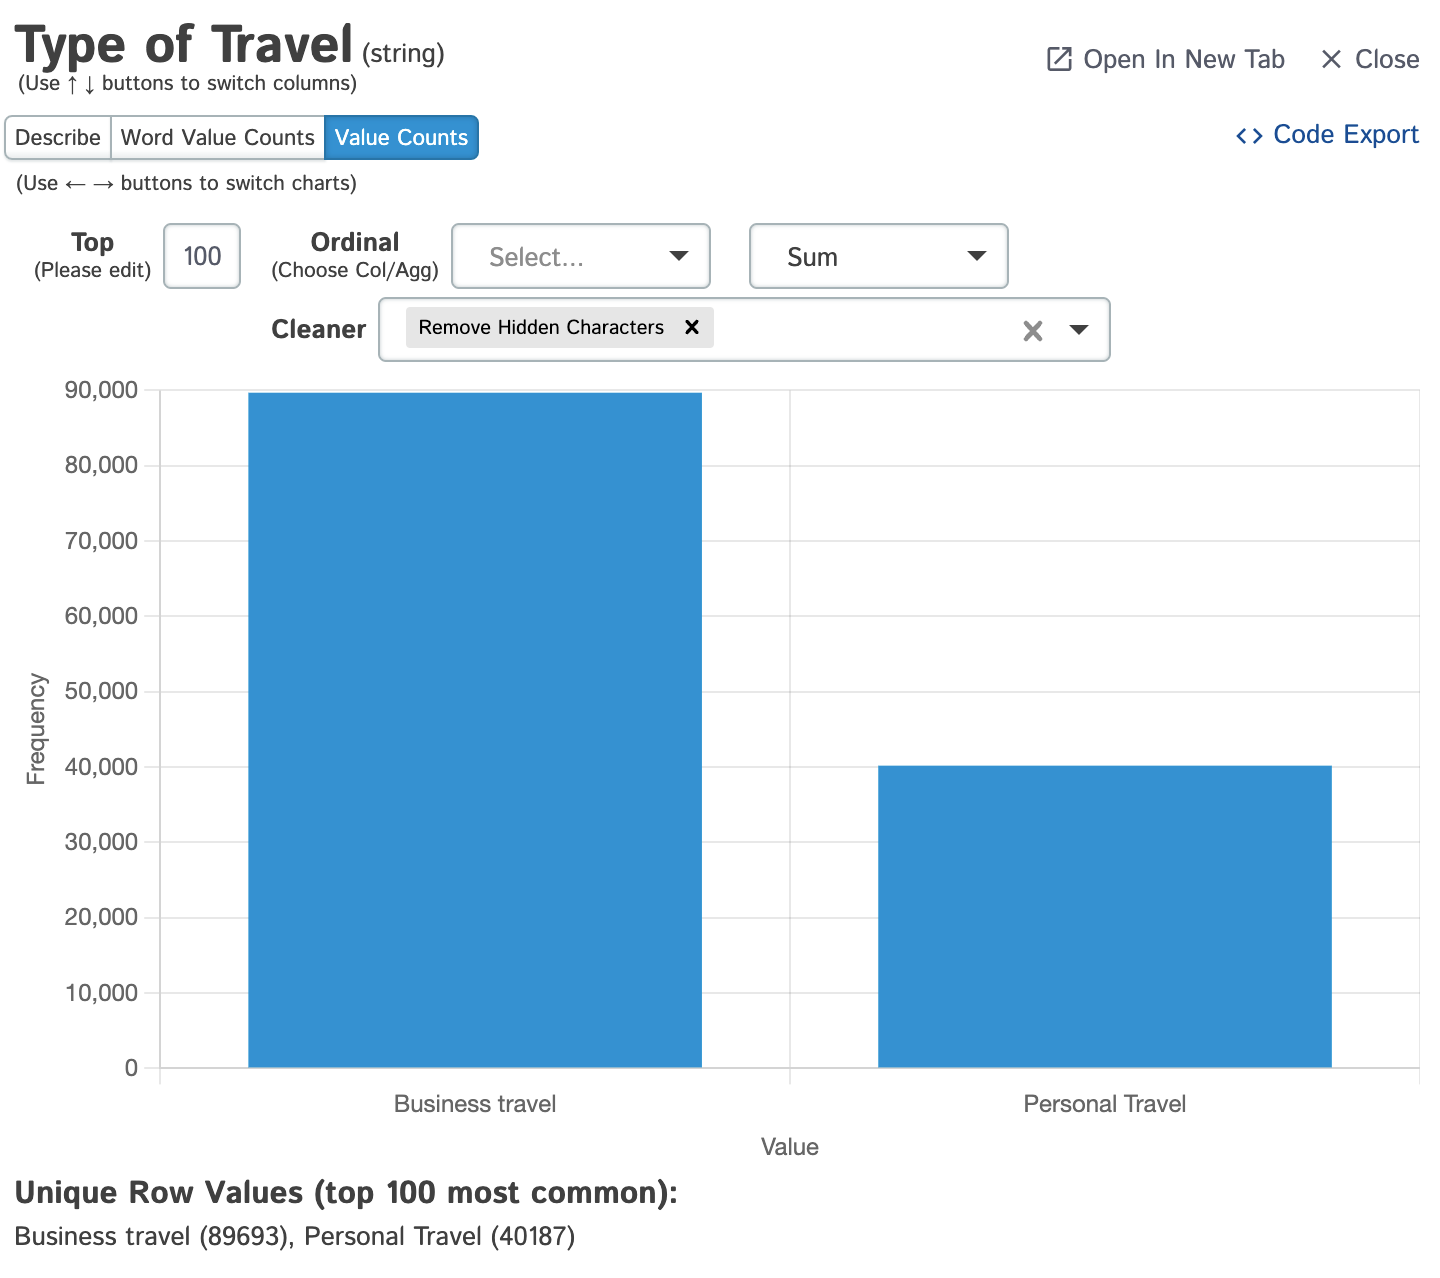

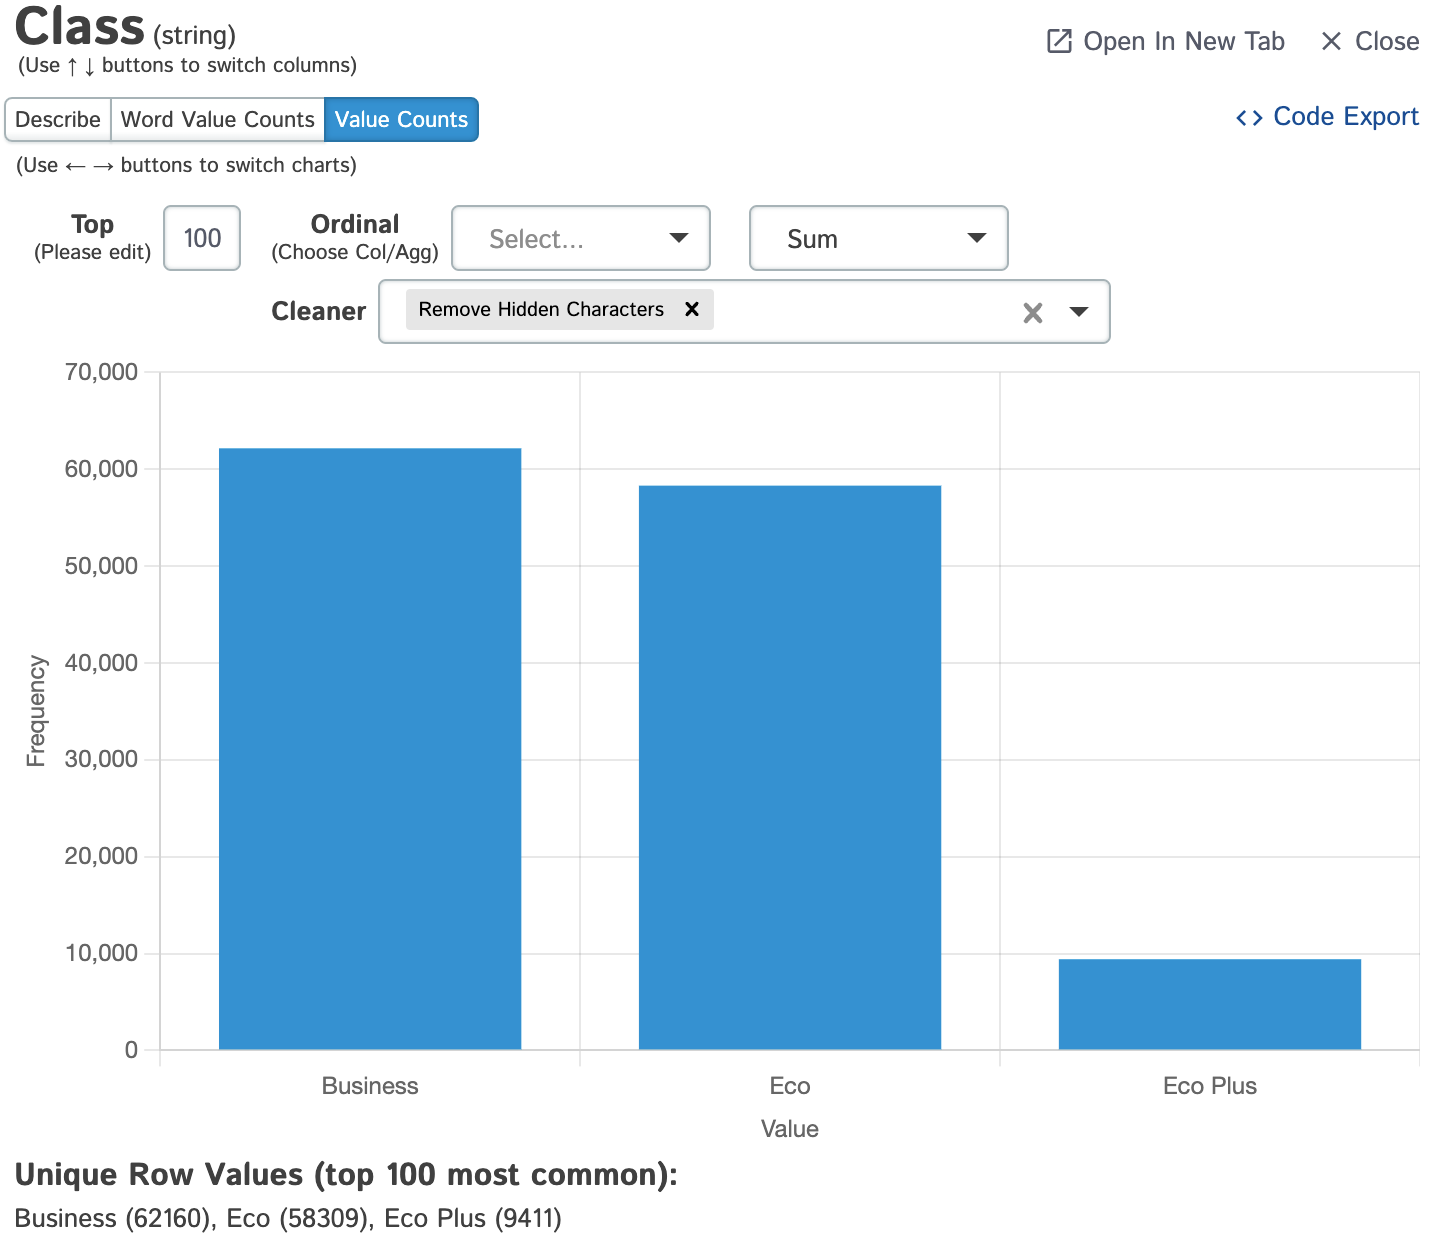

This distribution makes common sense. Let's remember to look at cross correlation between some of the above values.

Let's look at the characteristics of the flights.

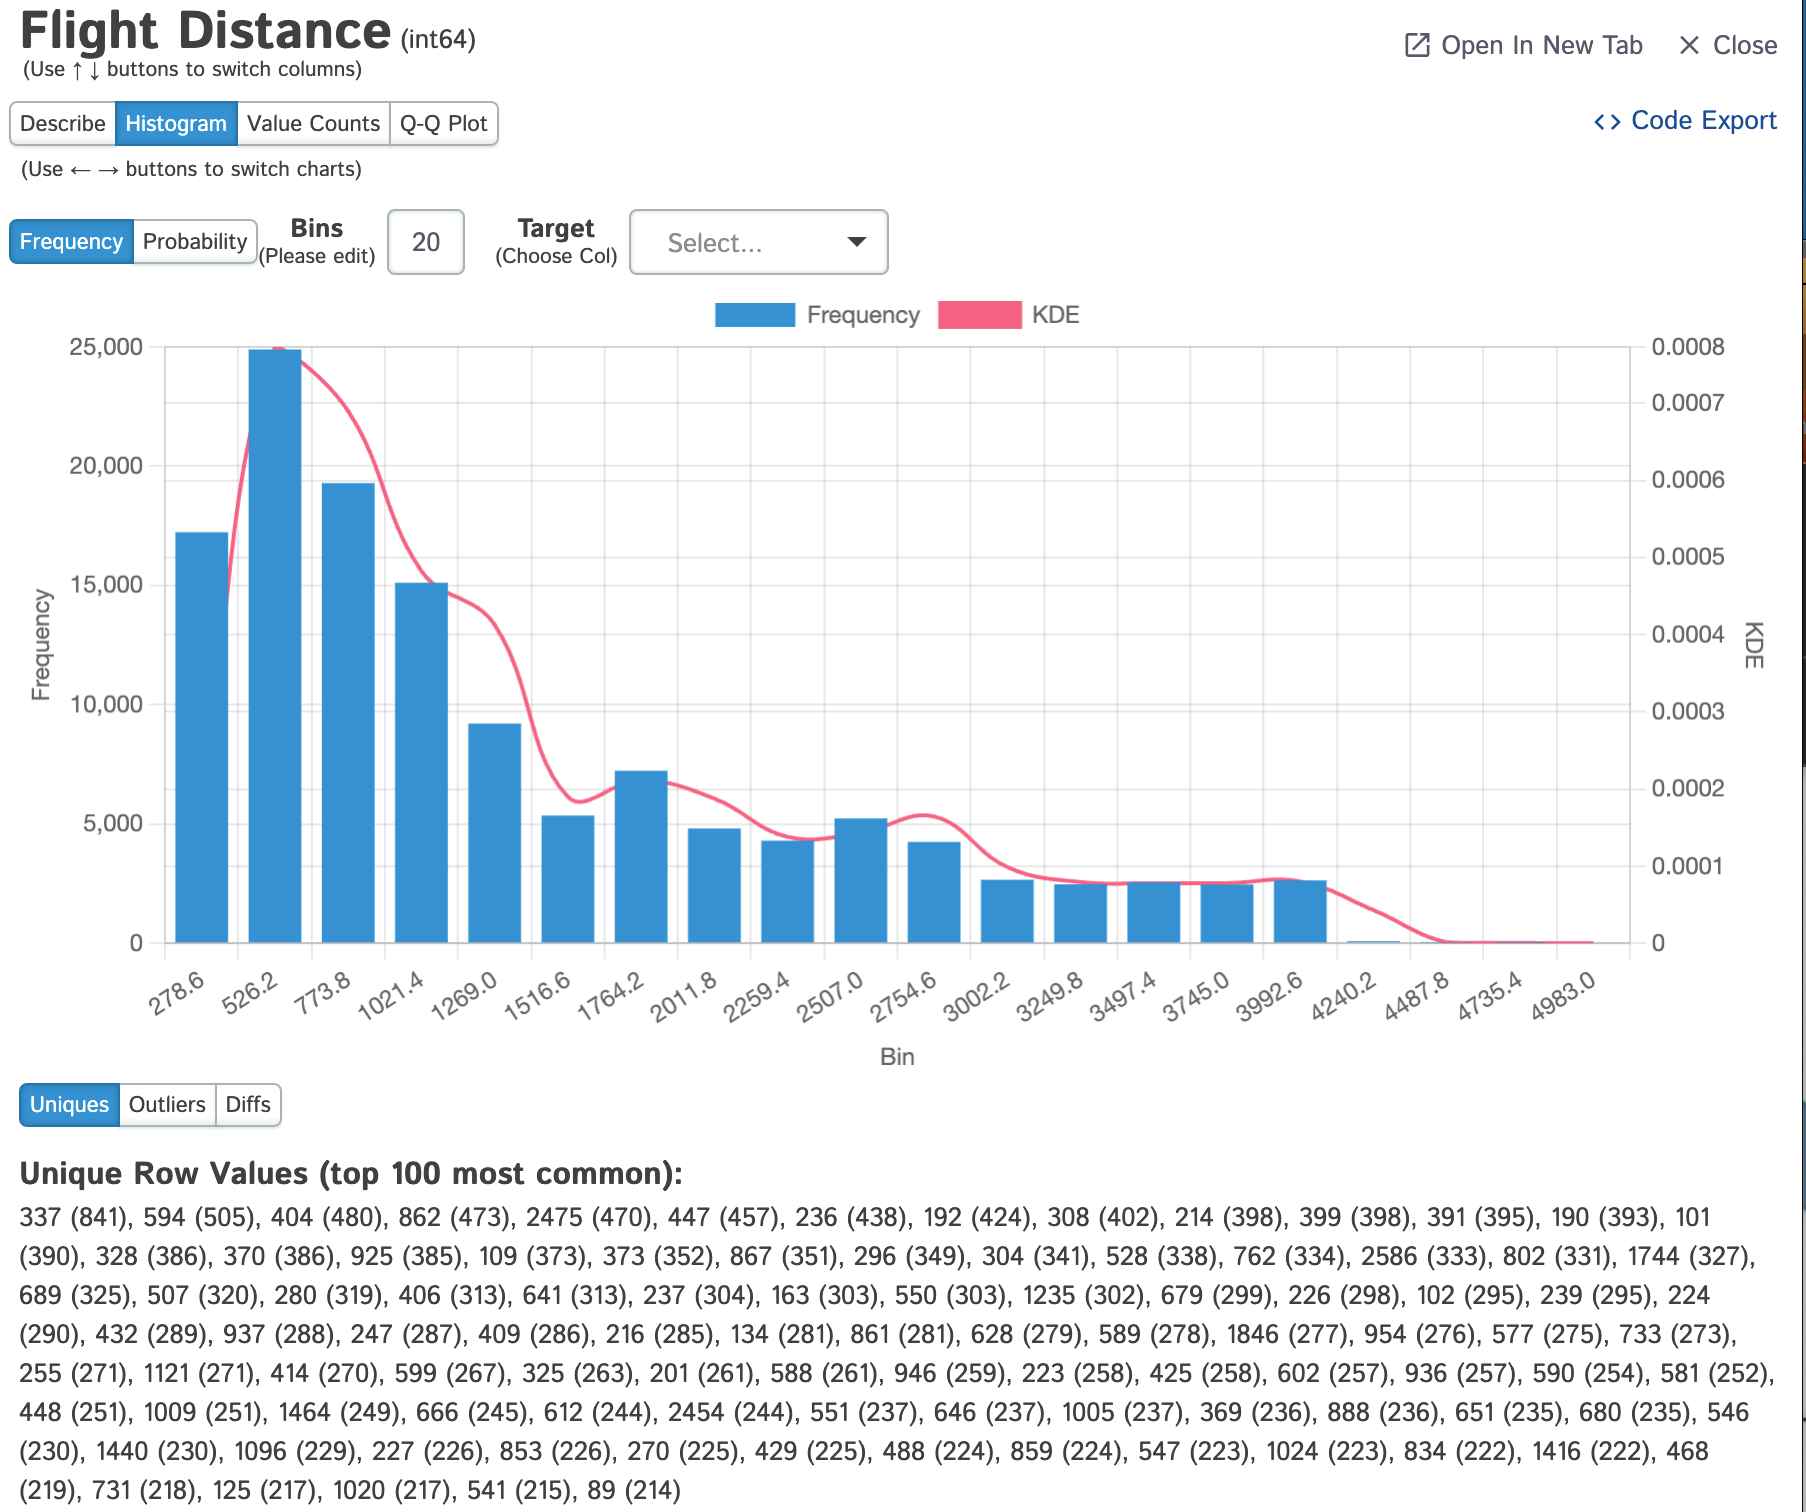

This appears to be consistent with the business class taking shorter flights.

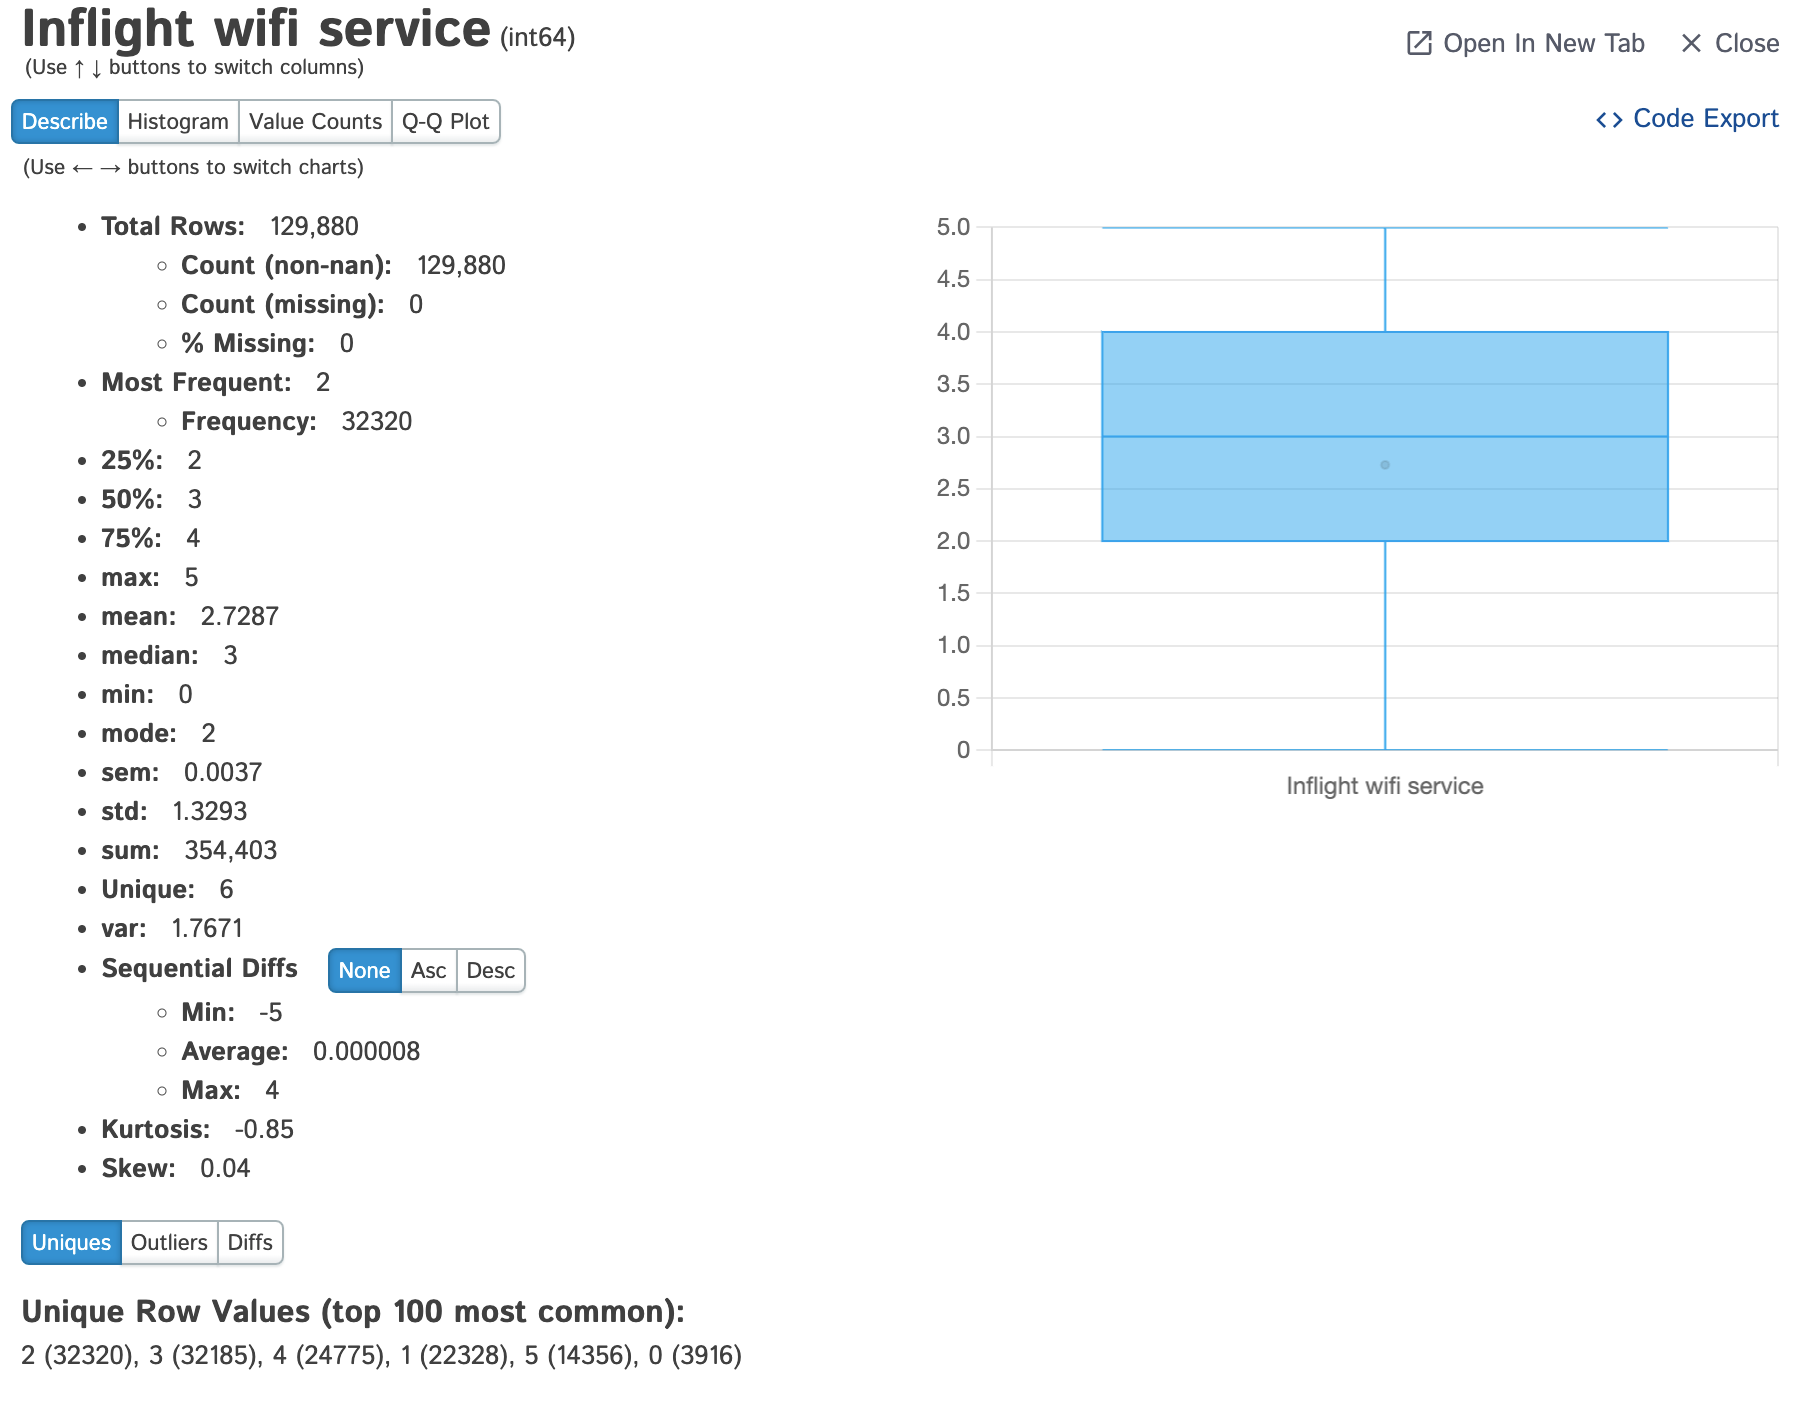

This is more confusing to interpret because there are no descriptors to tie to the 0 - 5 values except for the generic "higher is better". 

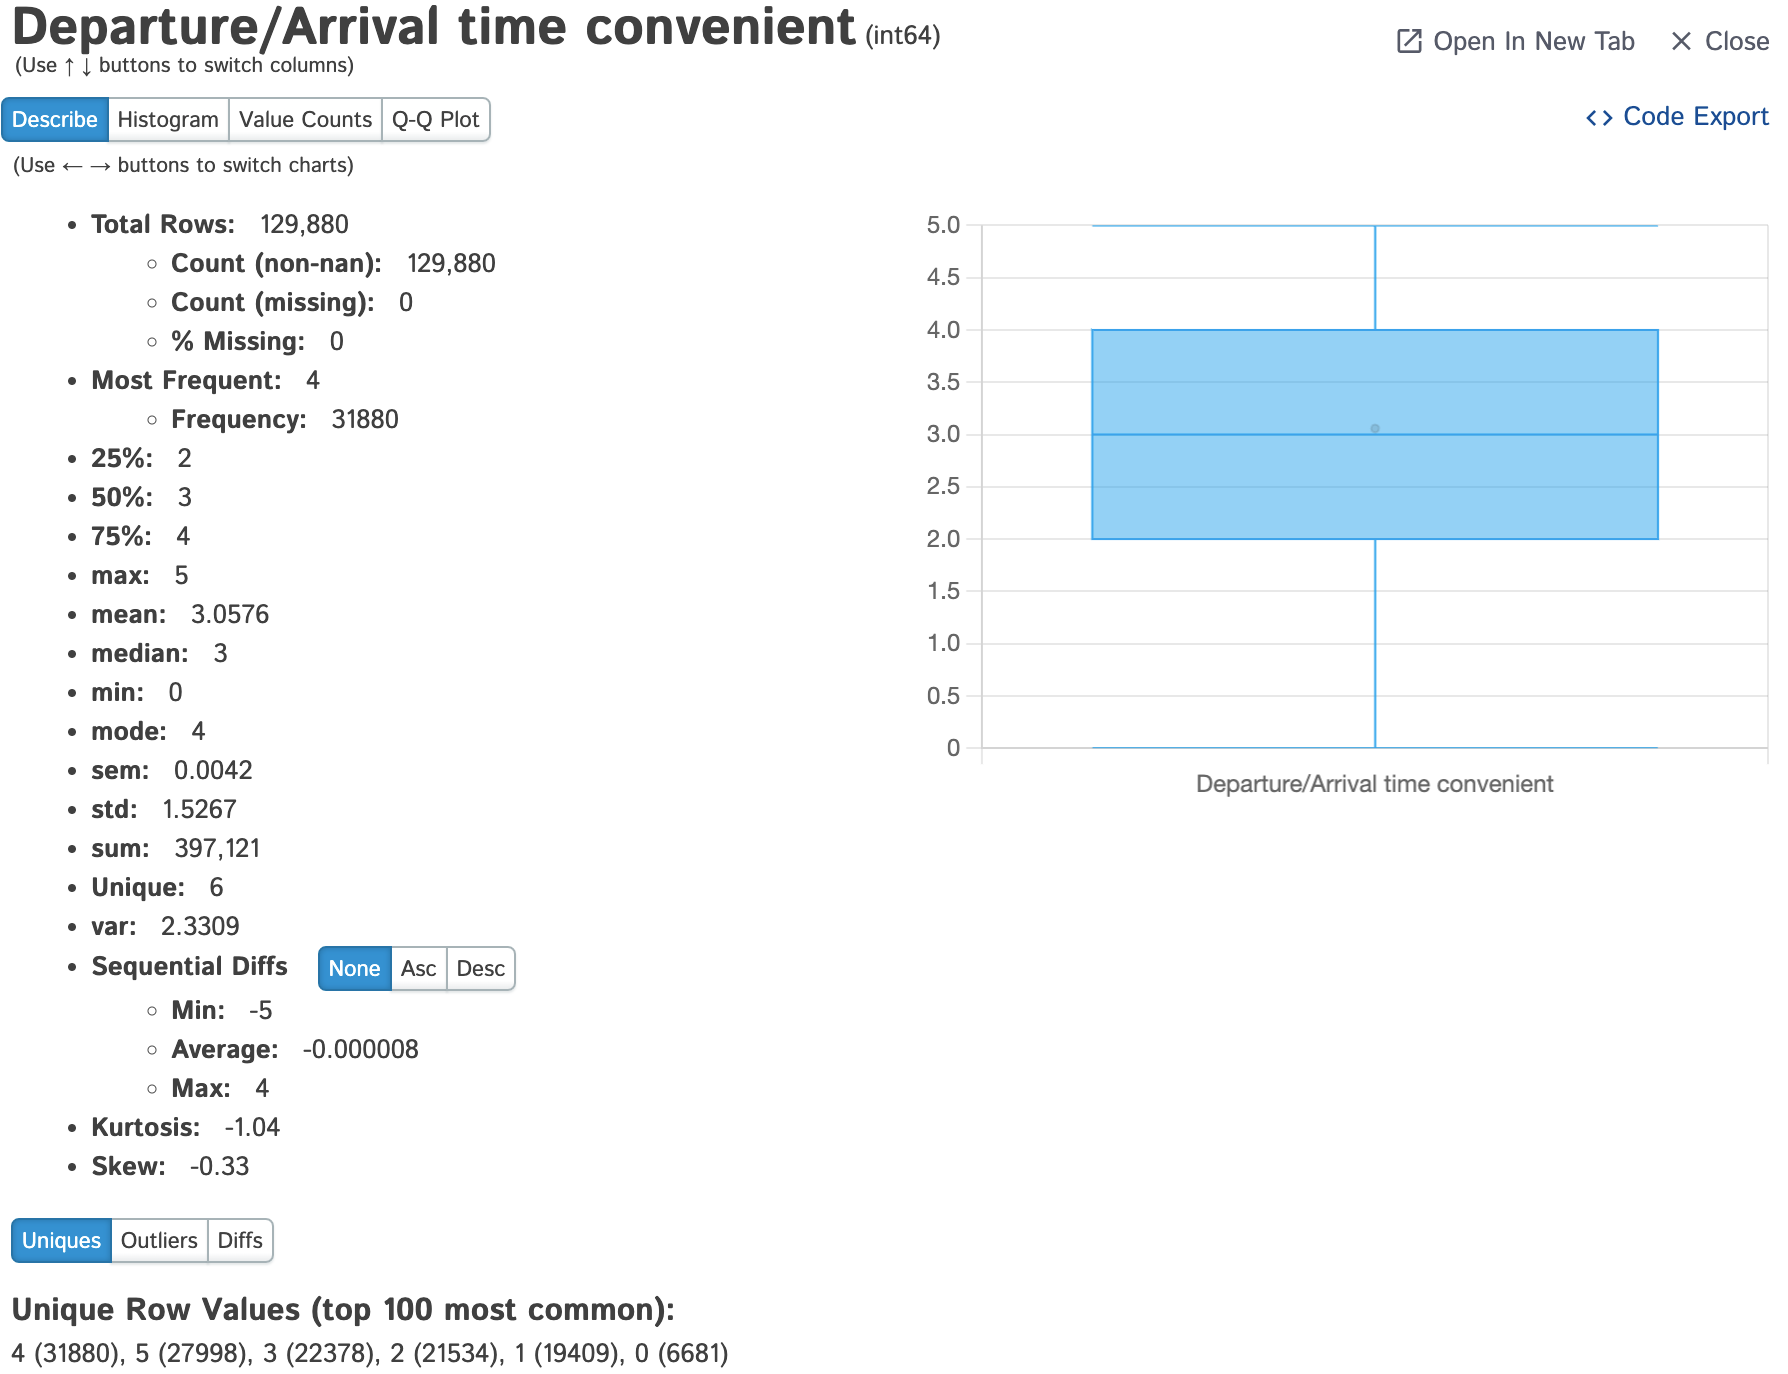

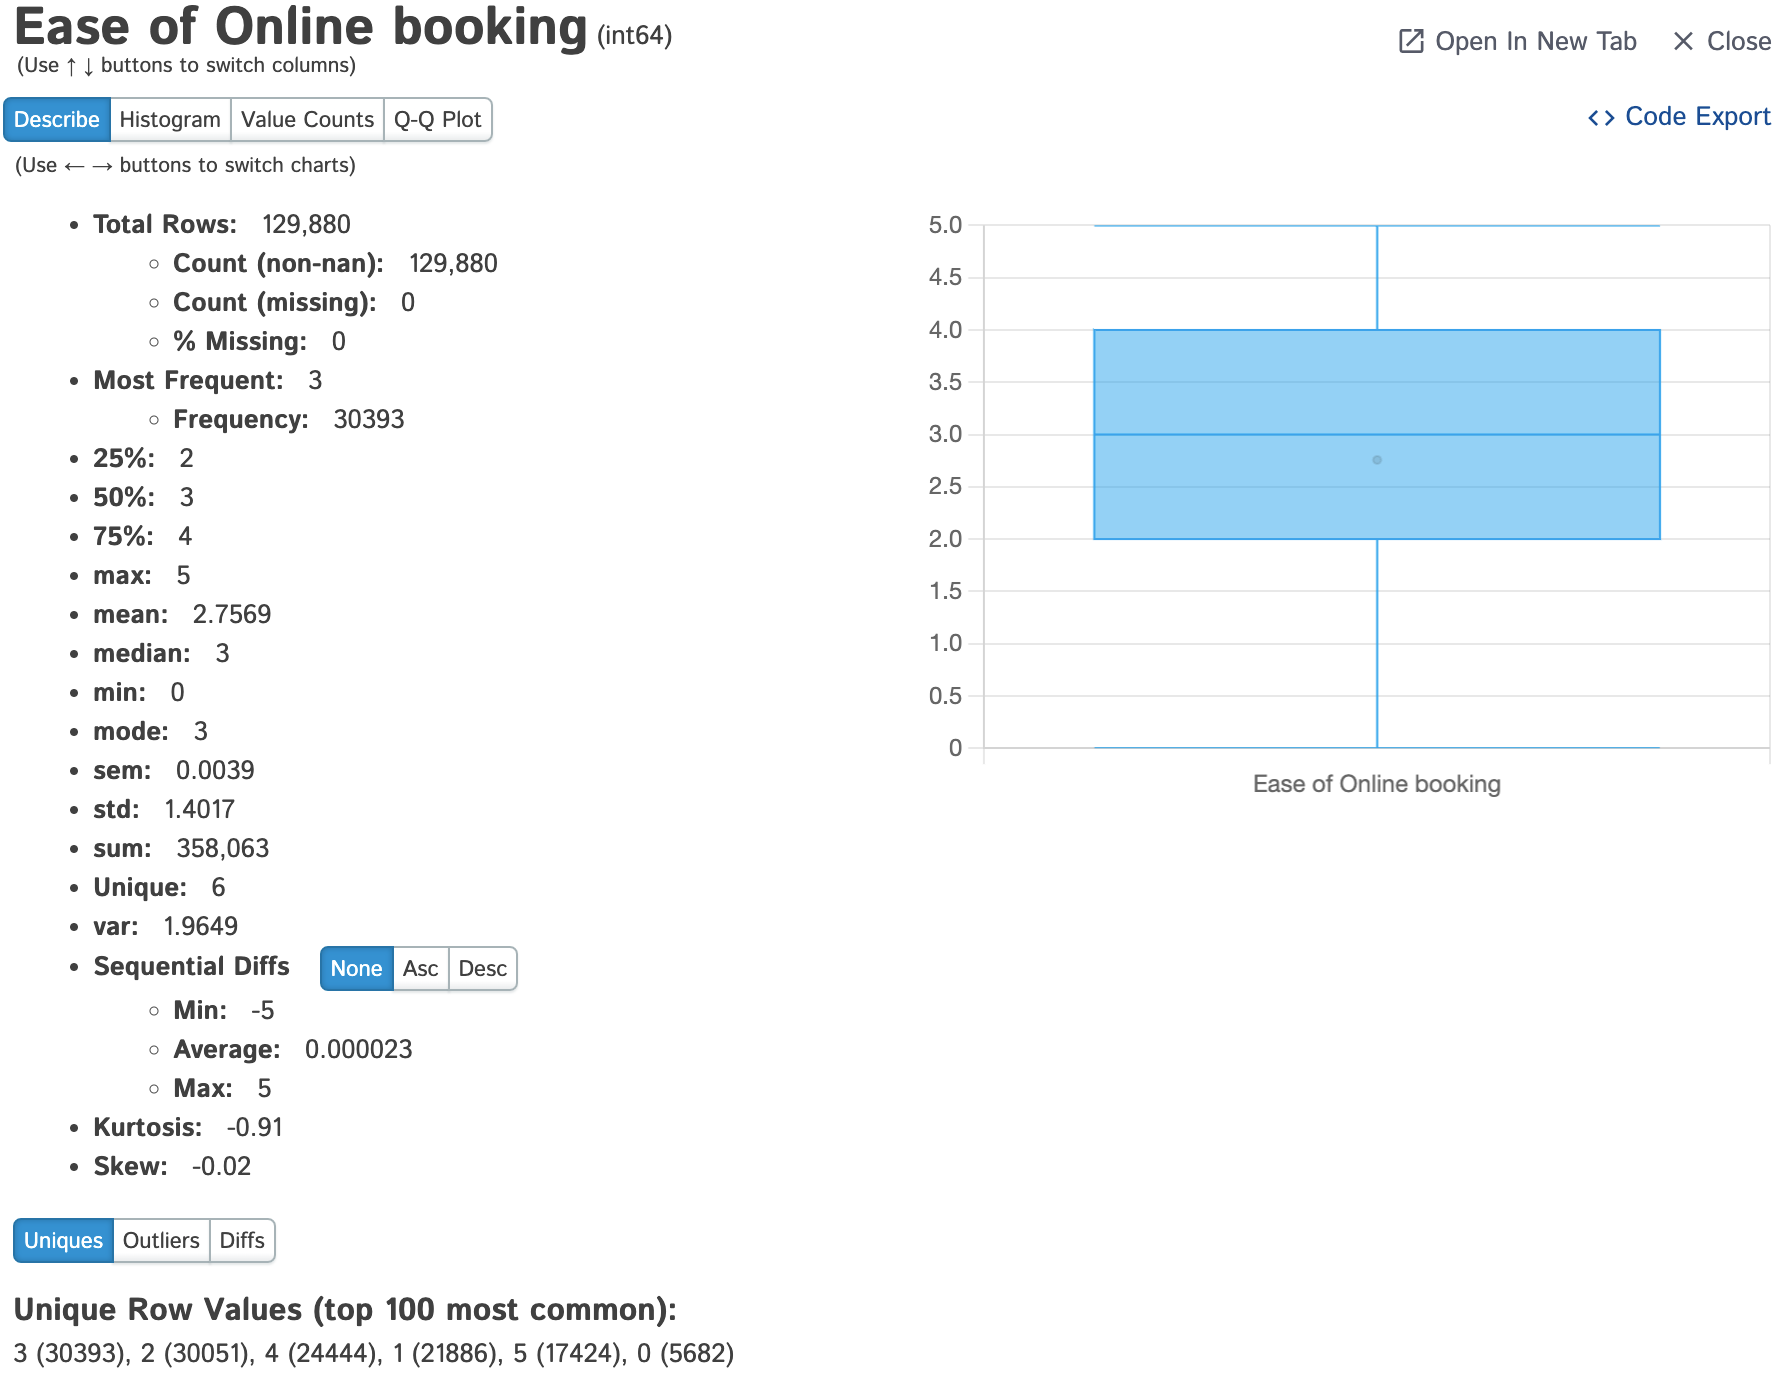

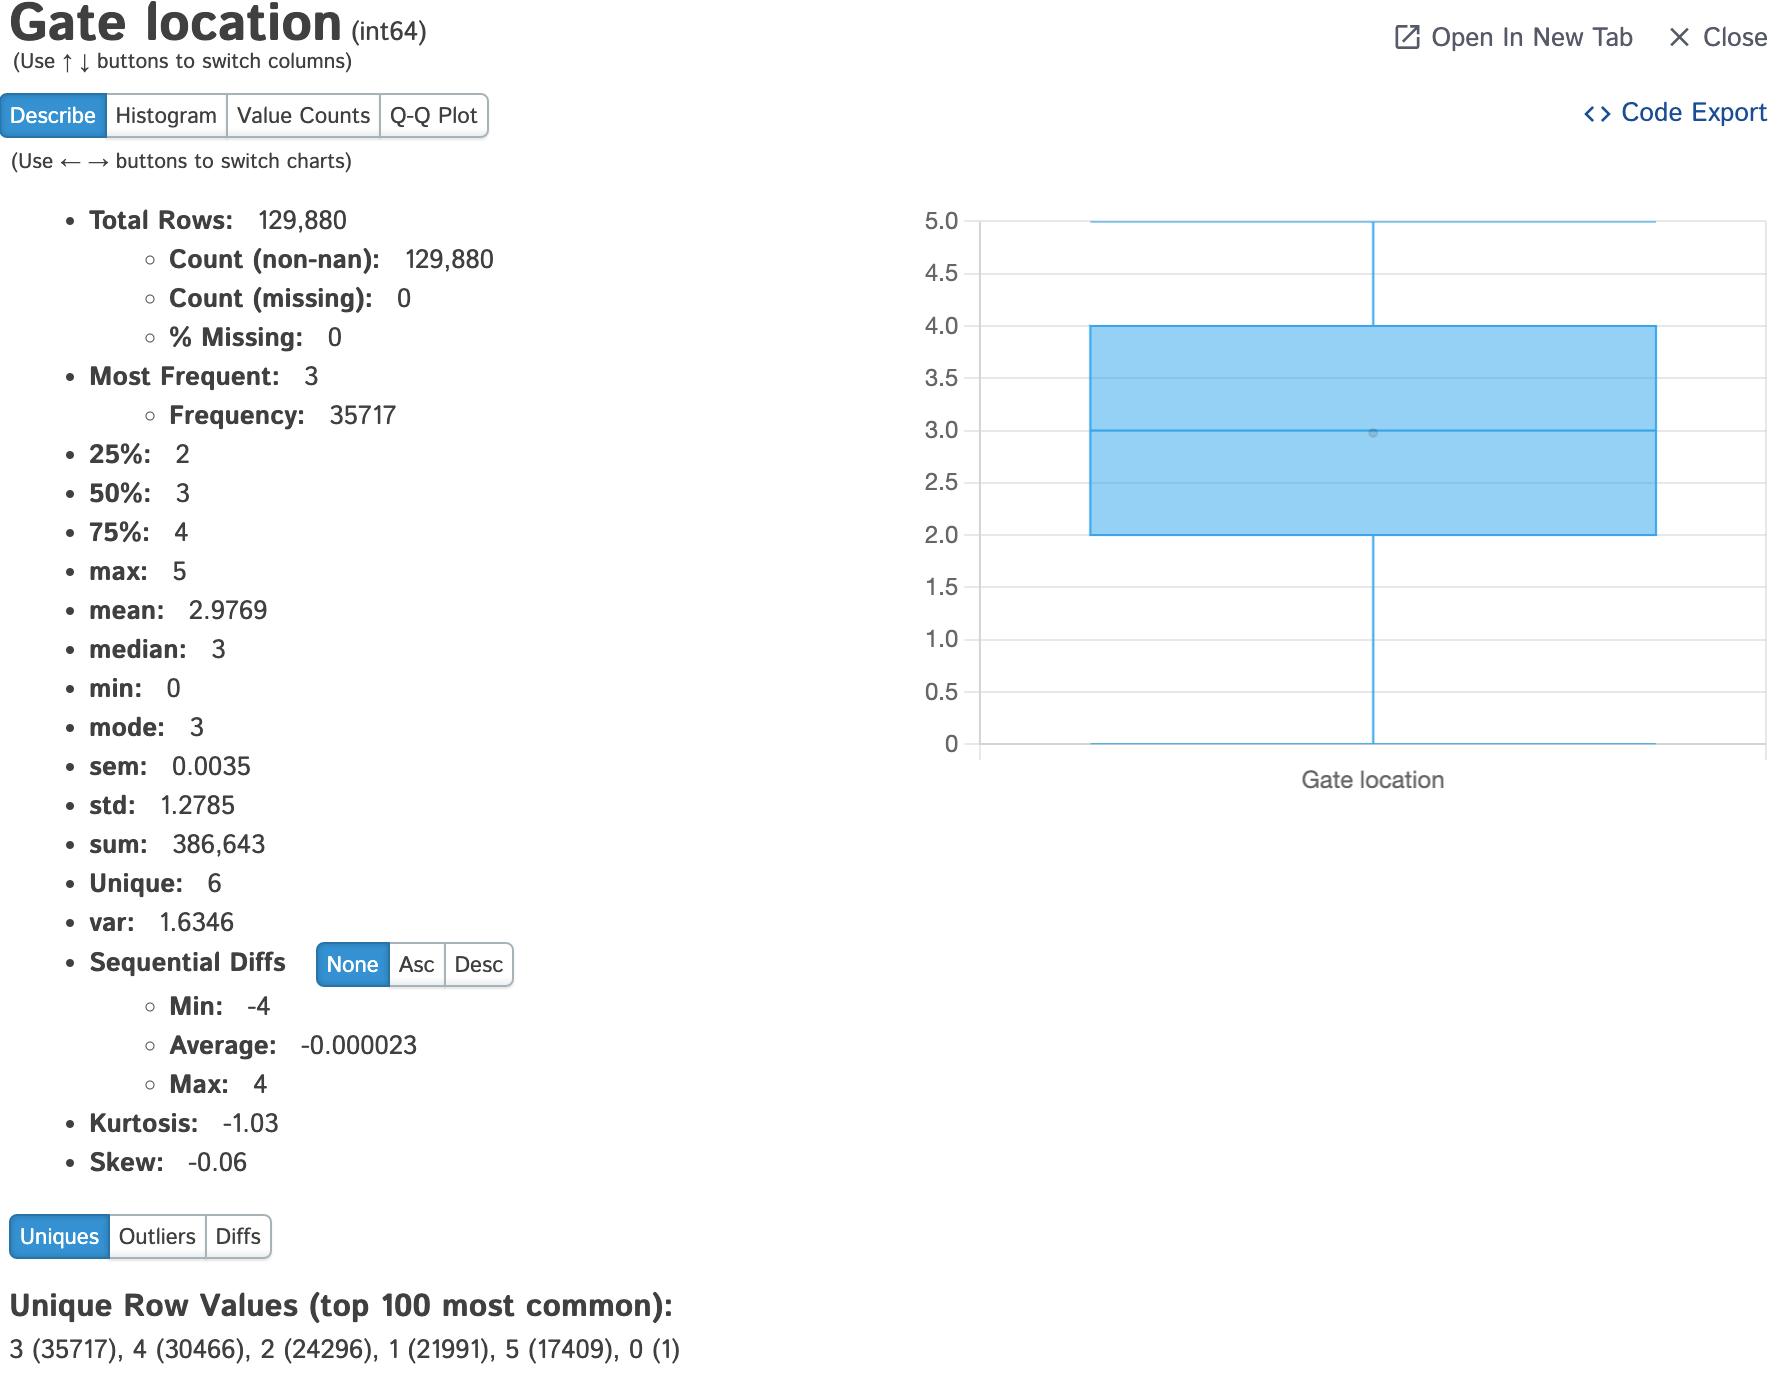

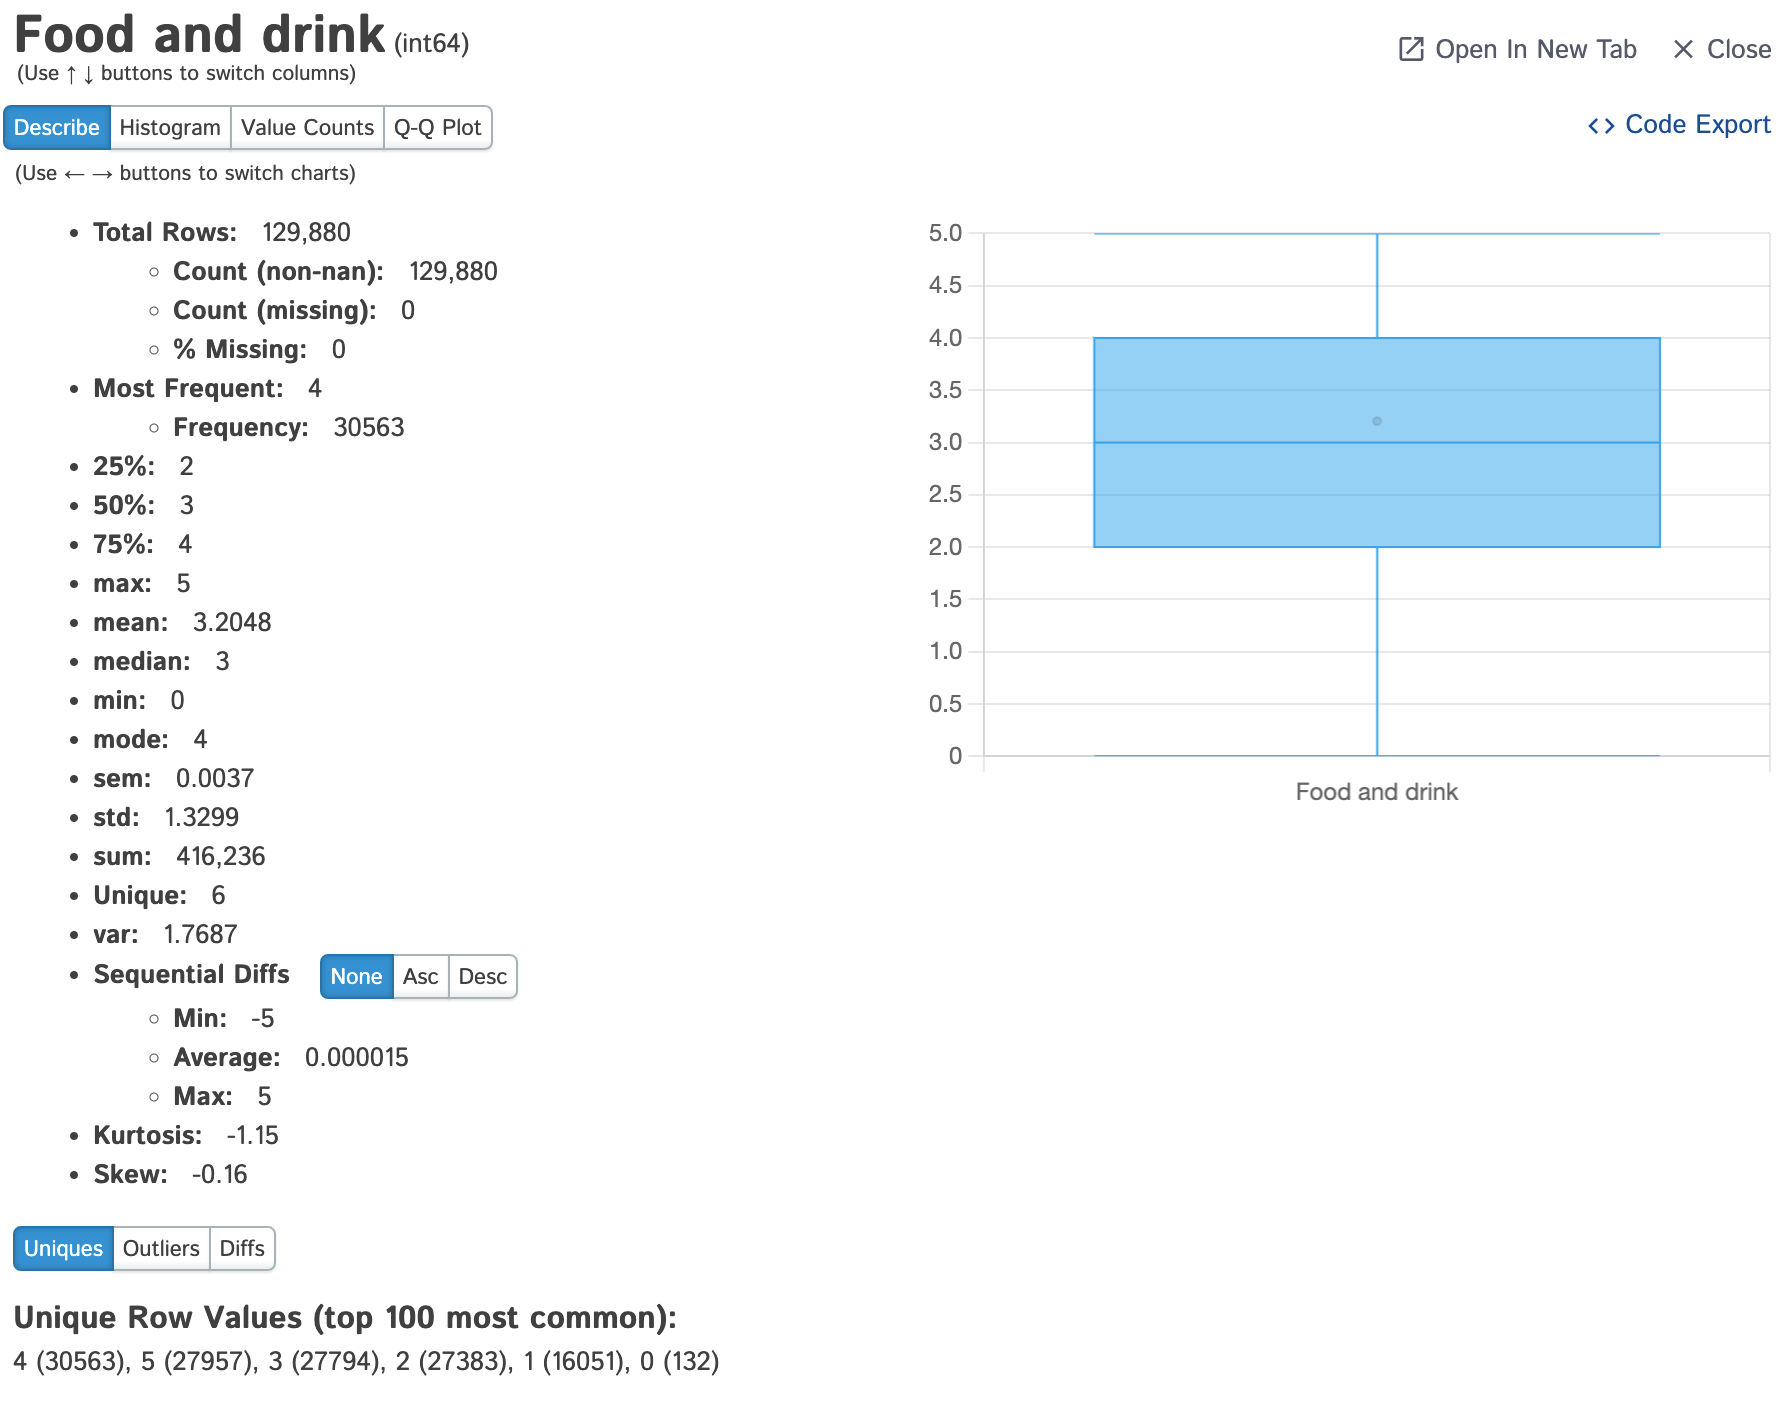

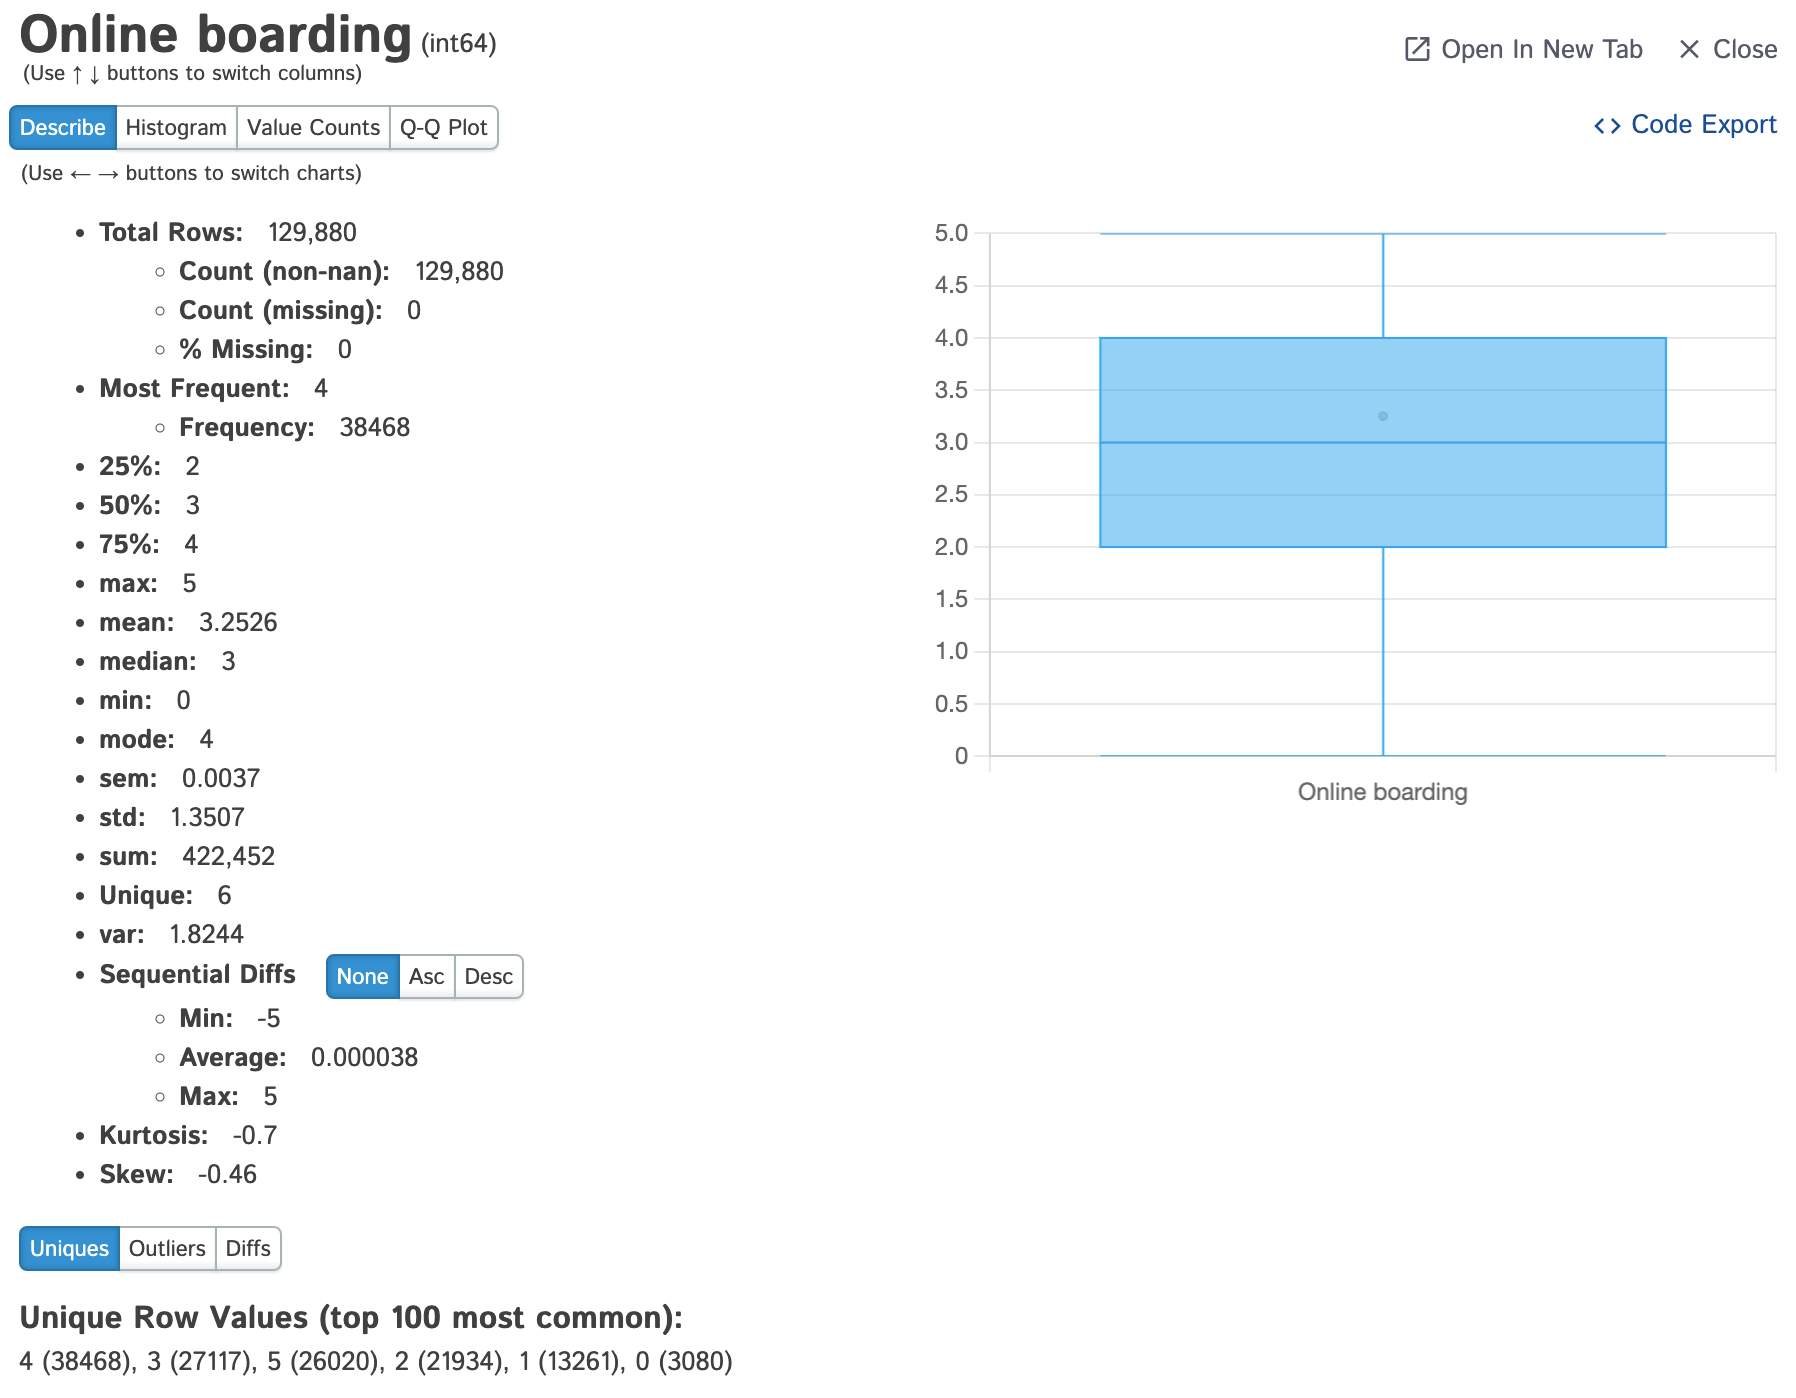

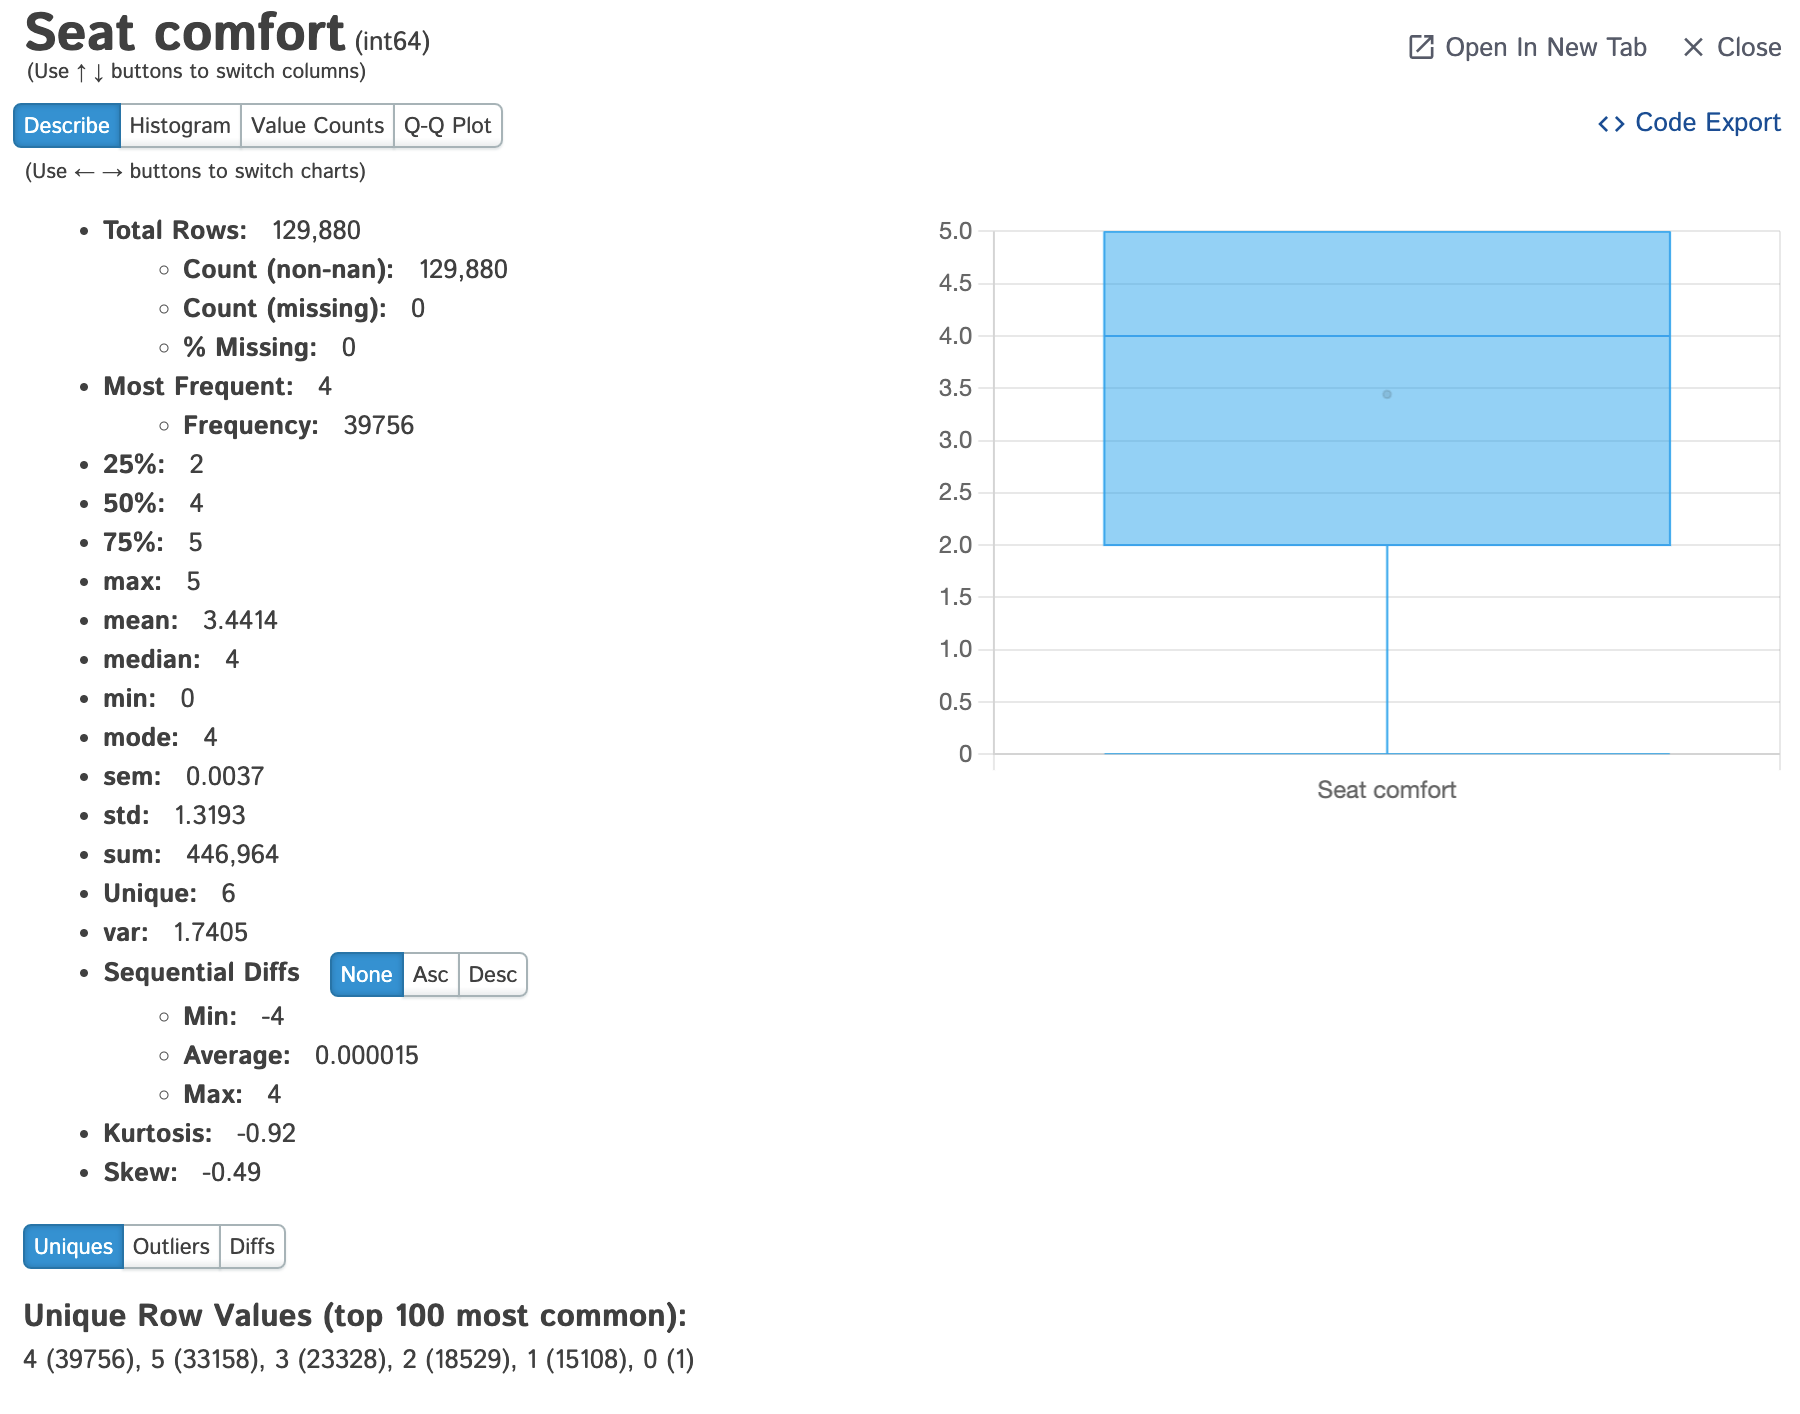

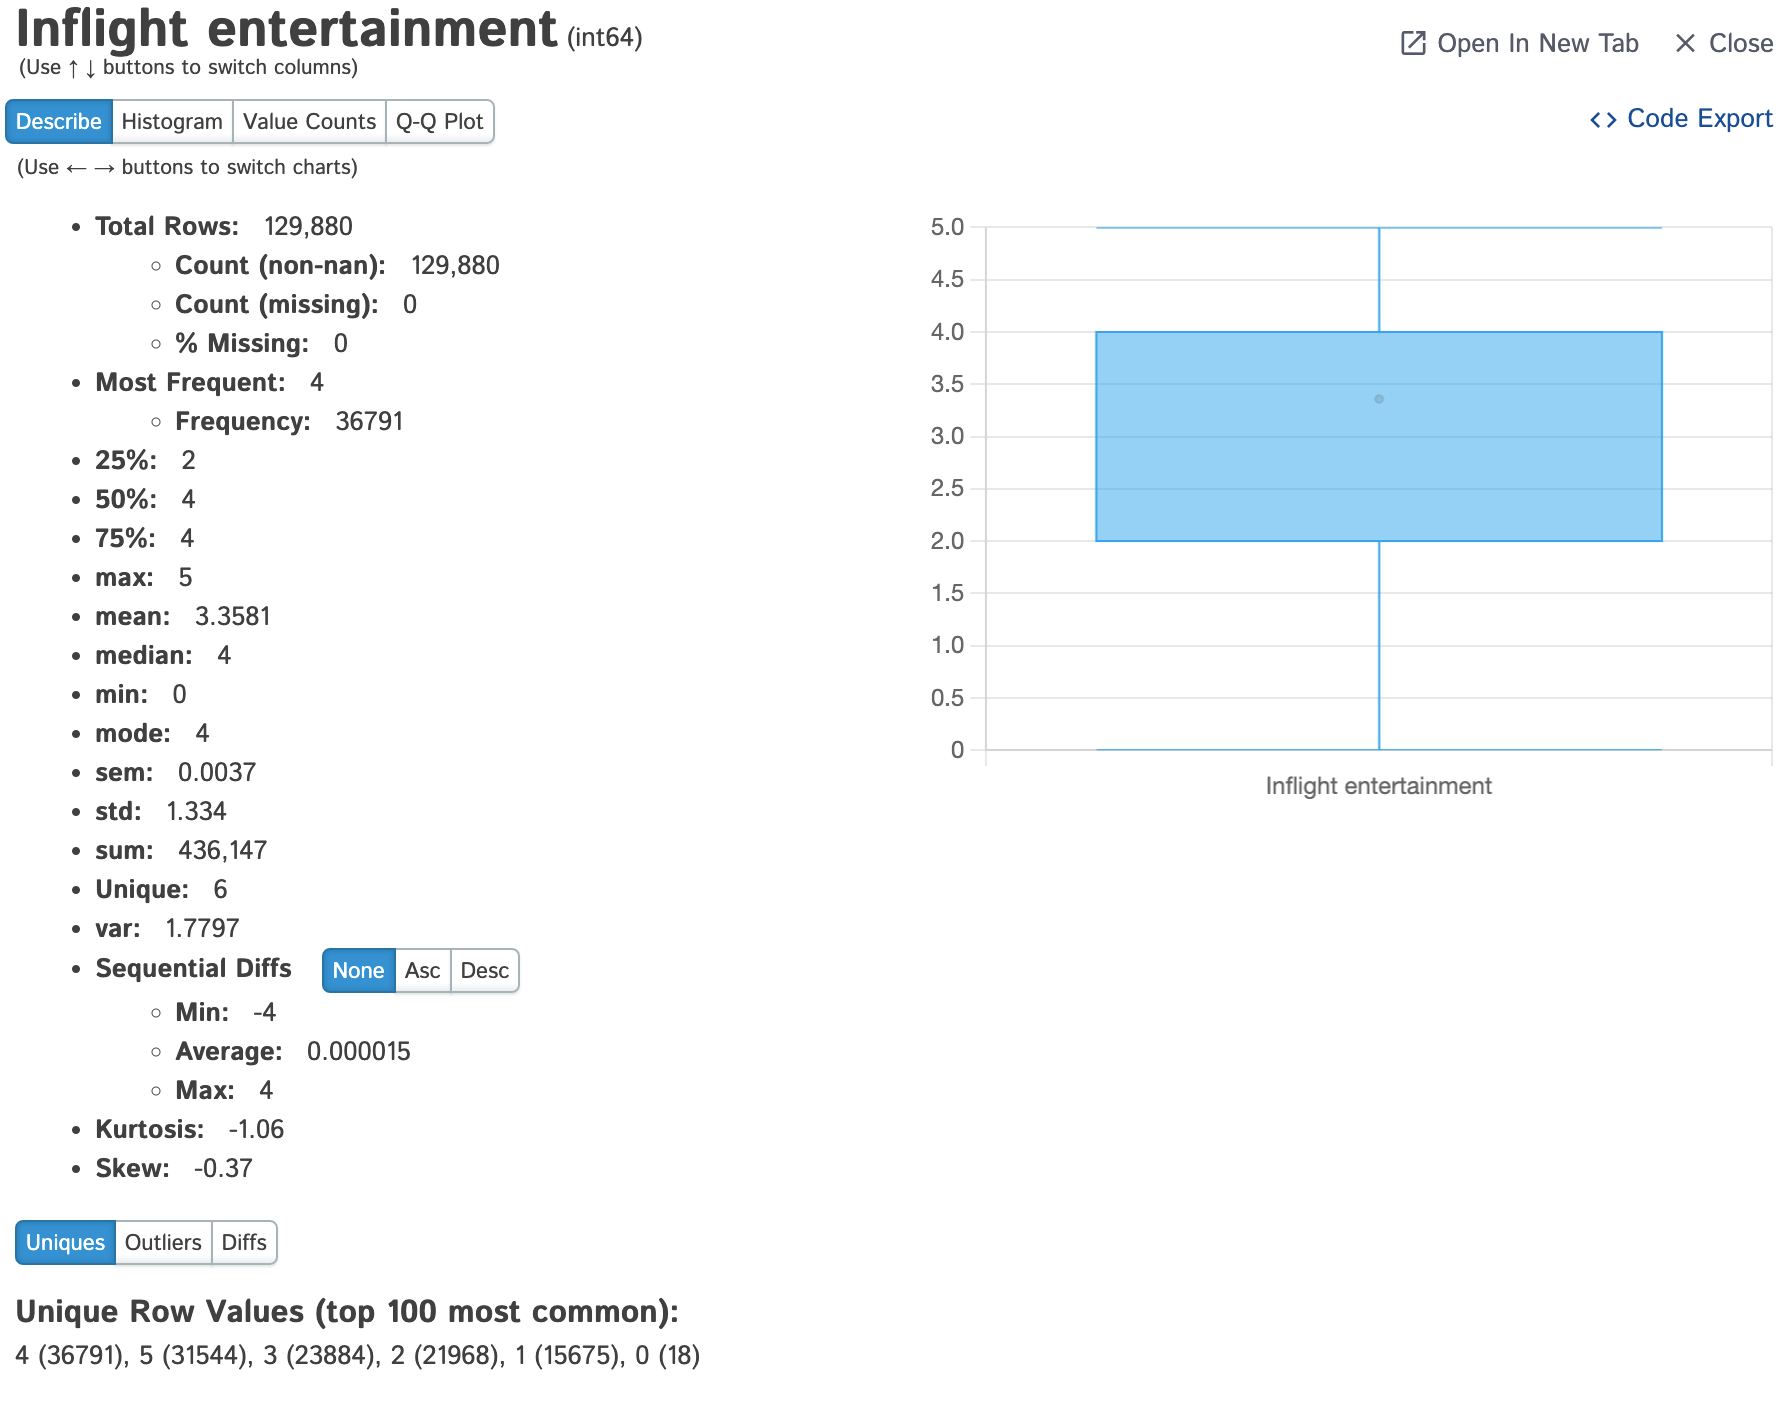

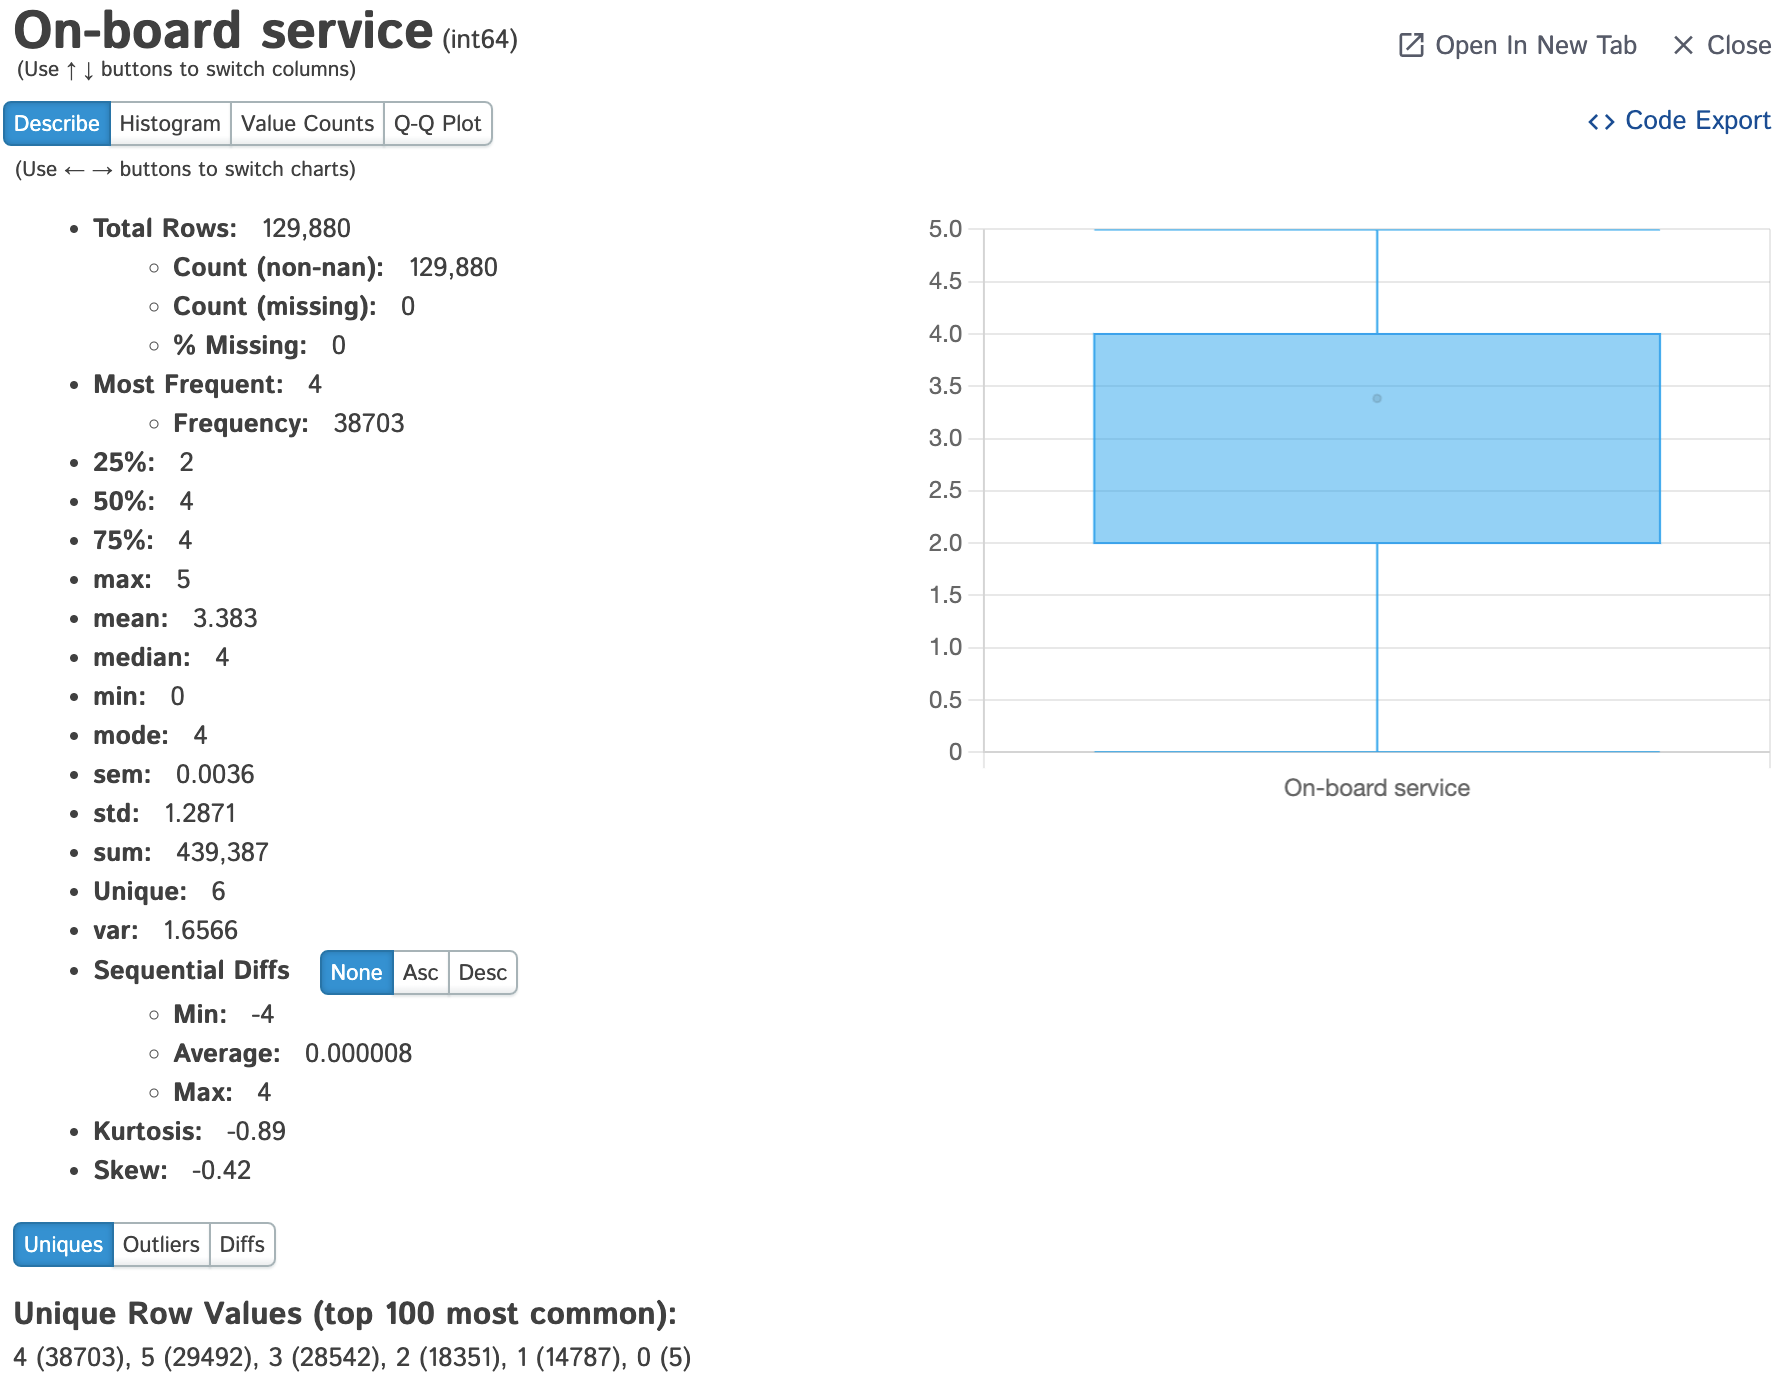

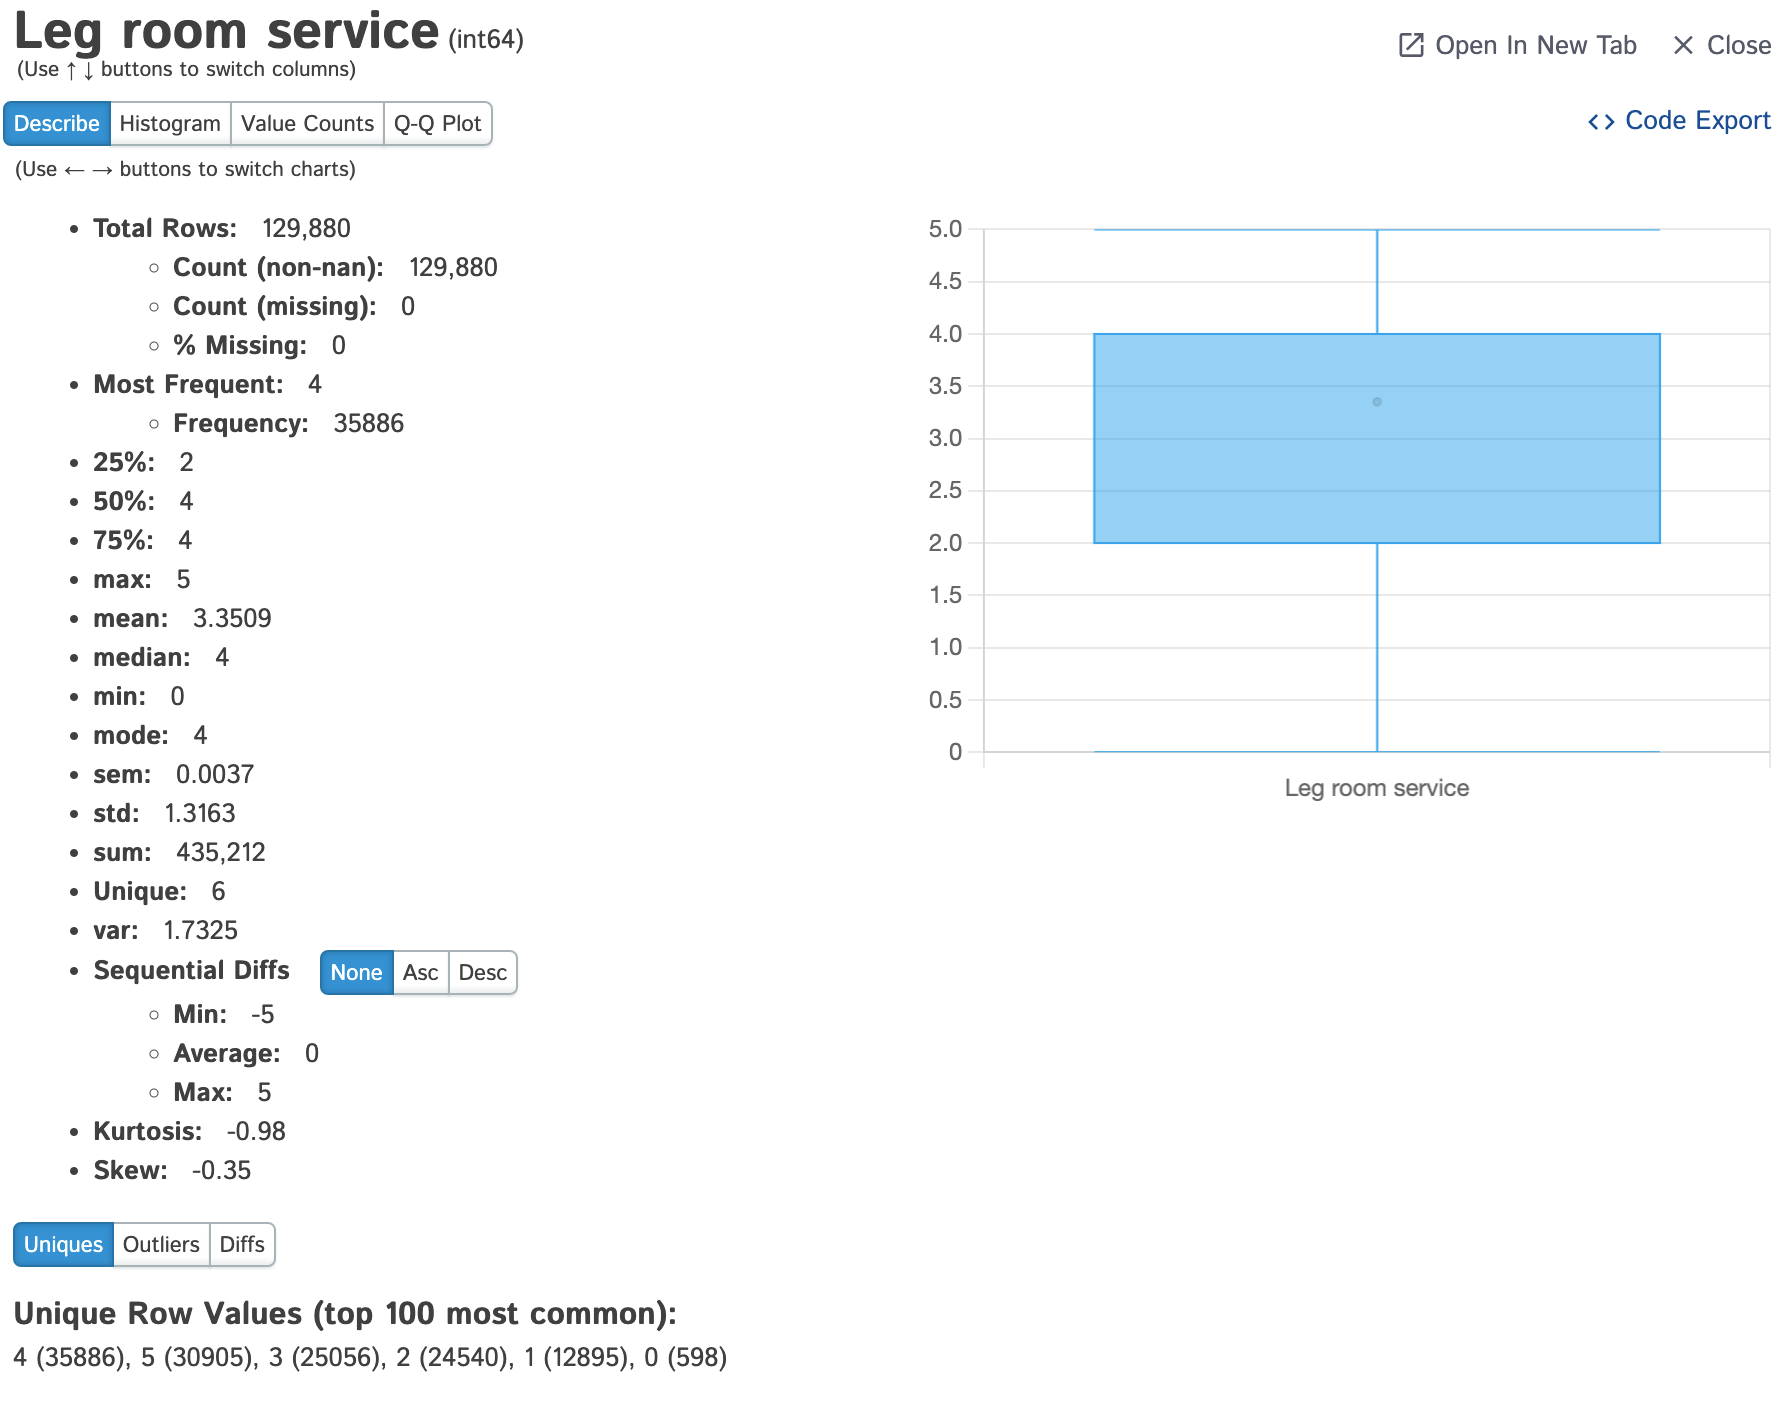

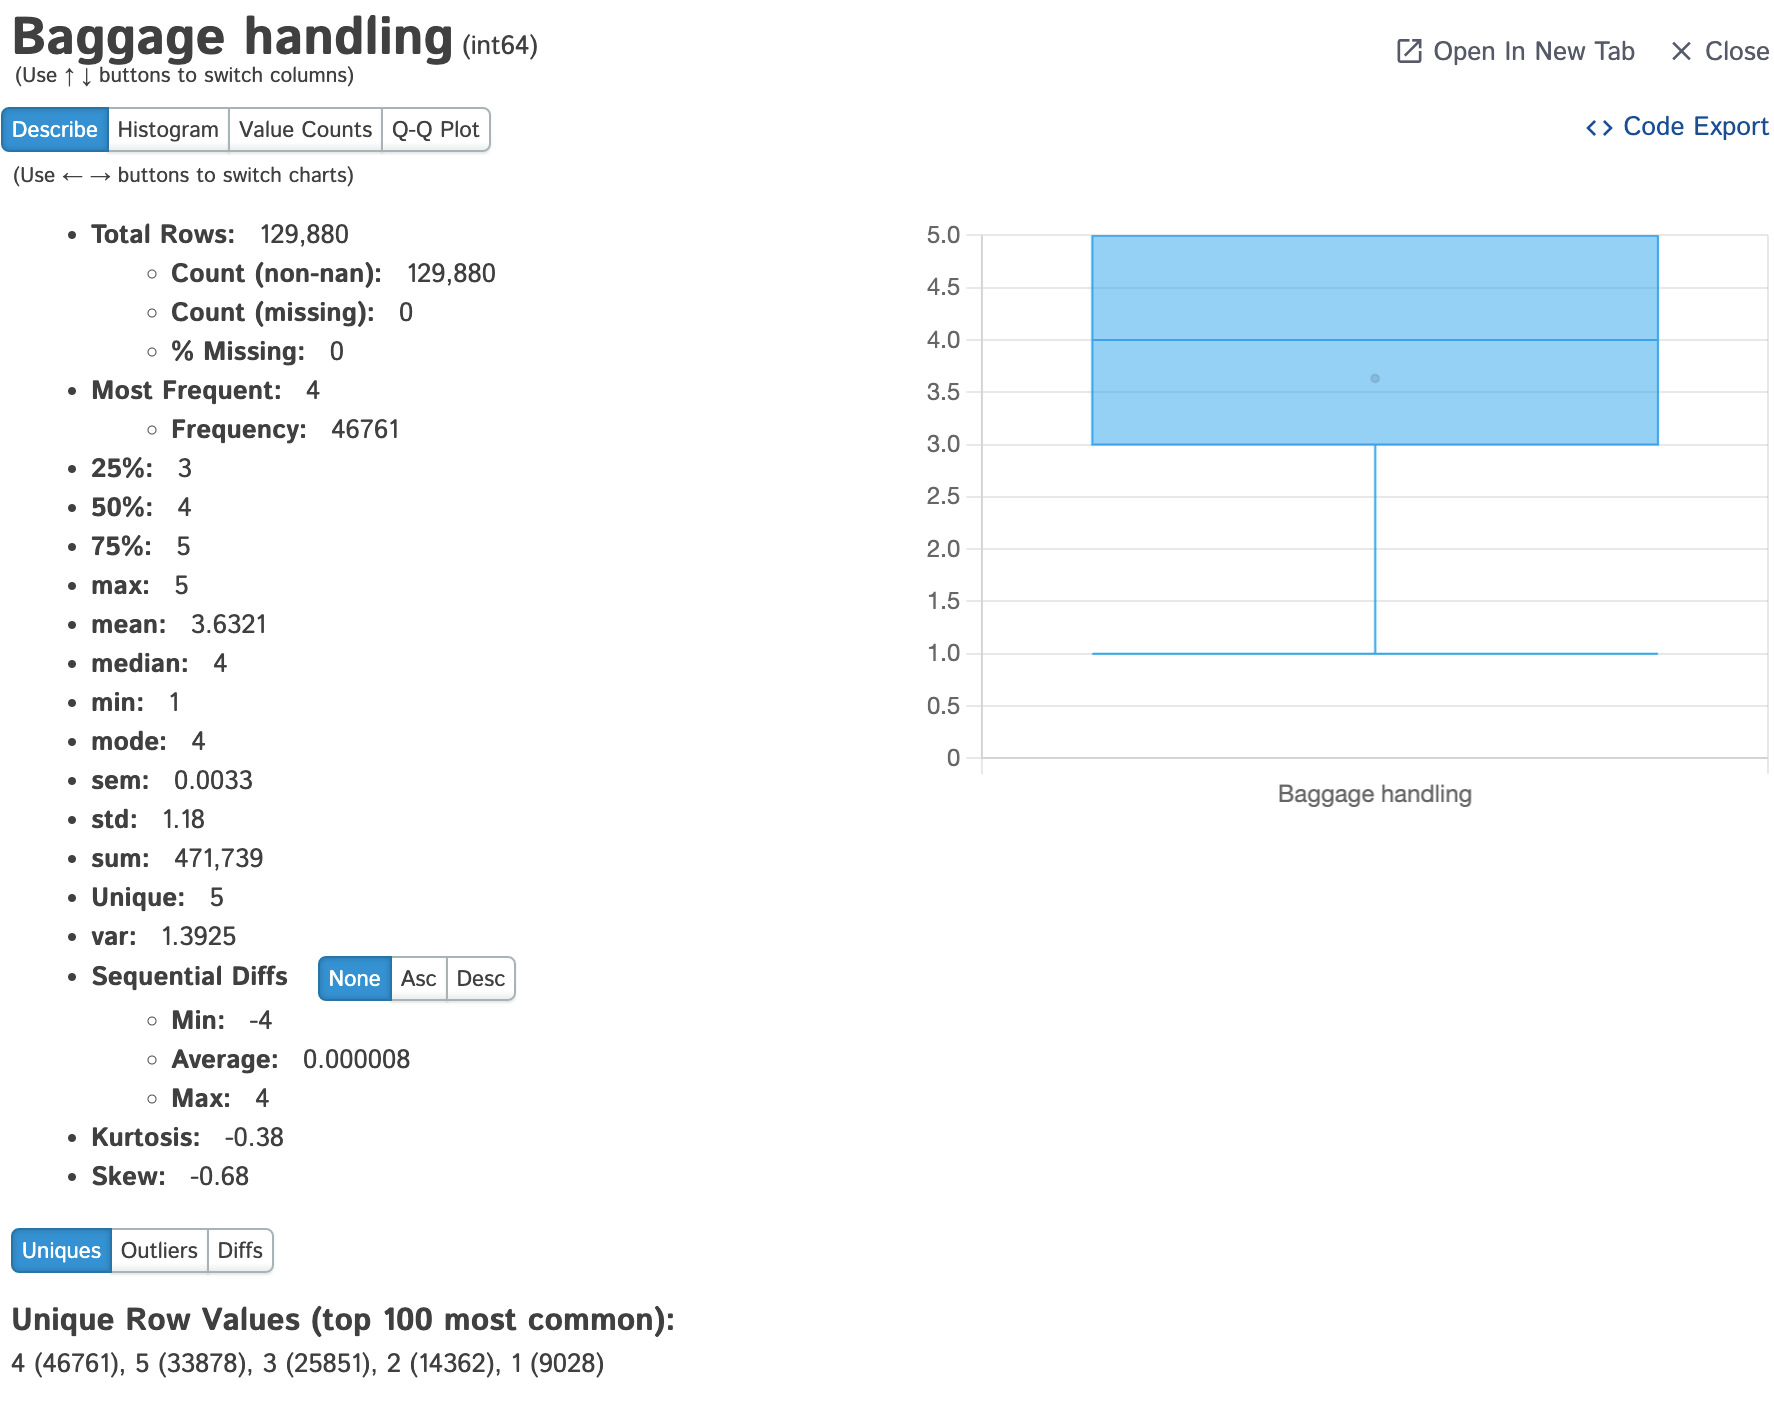

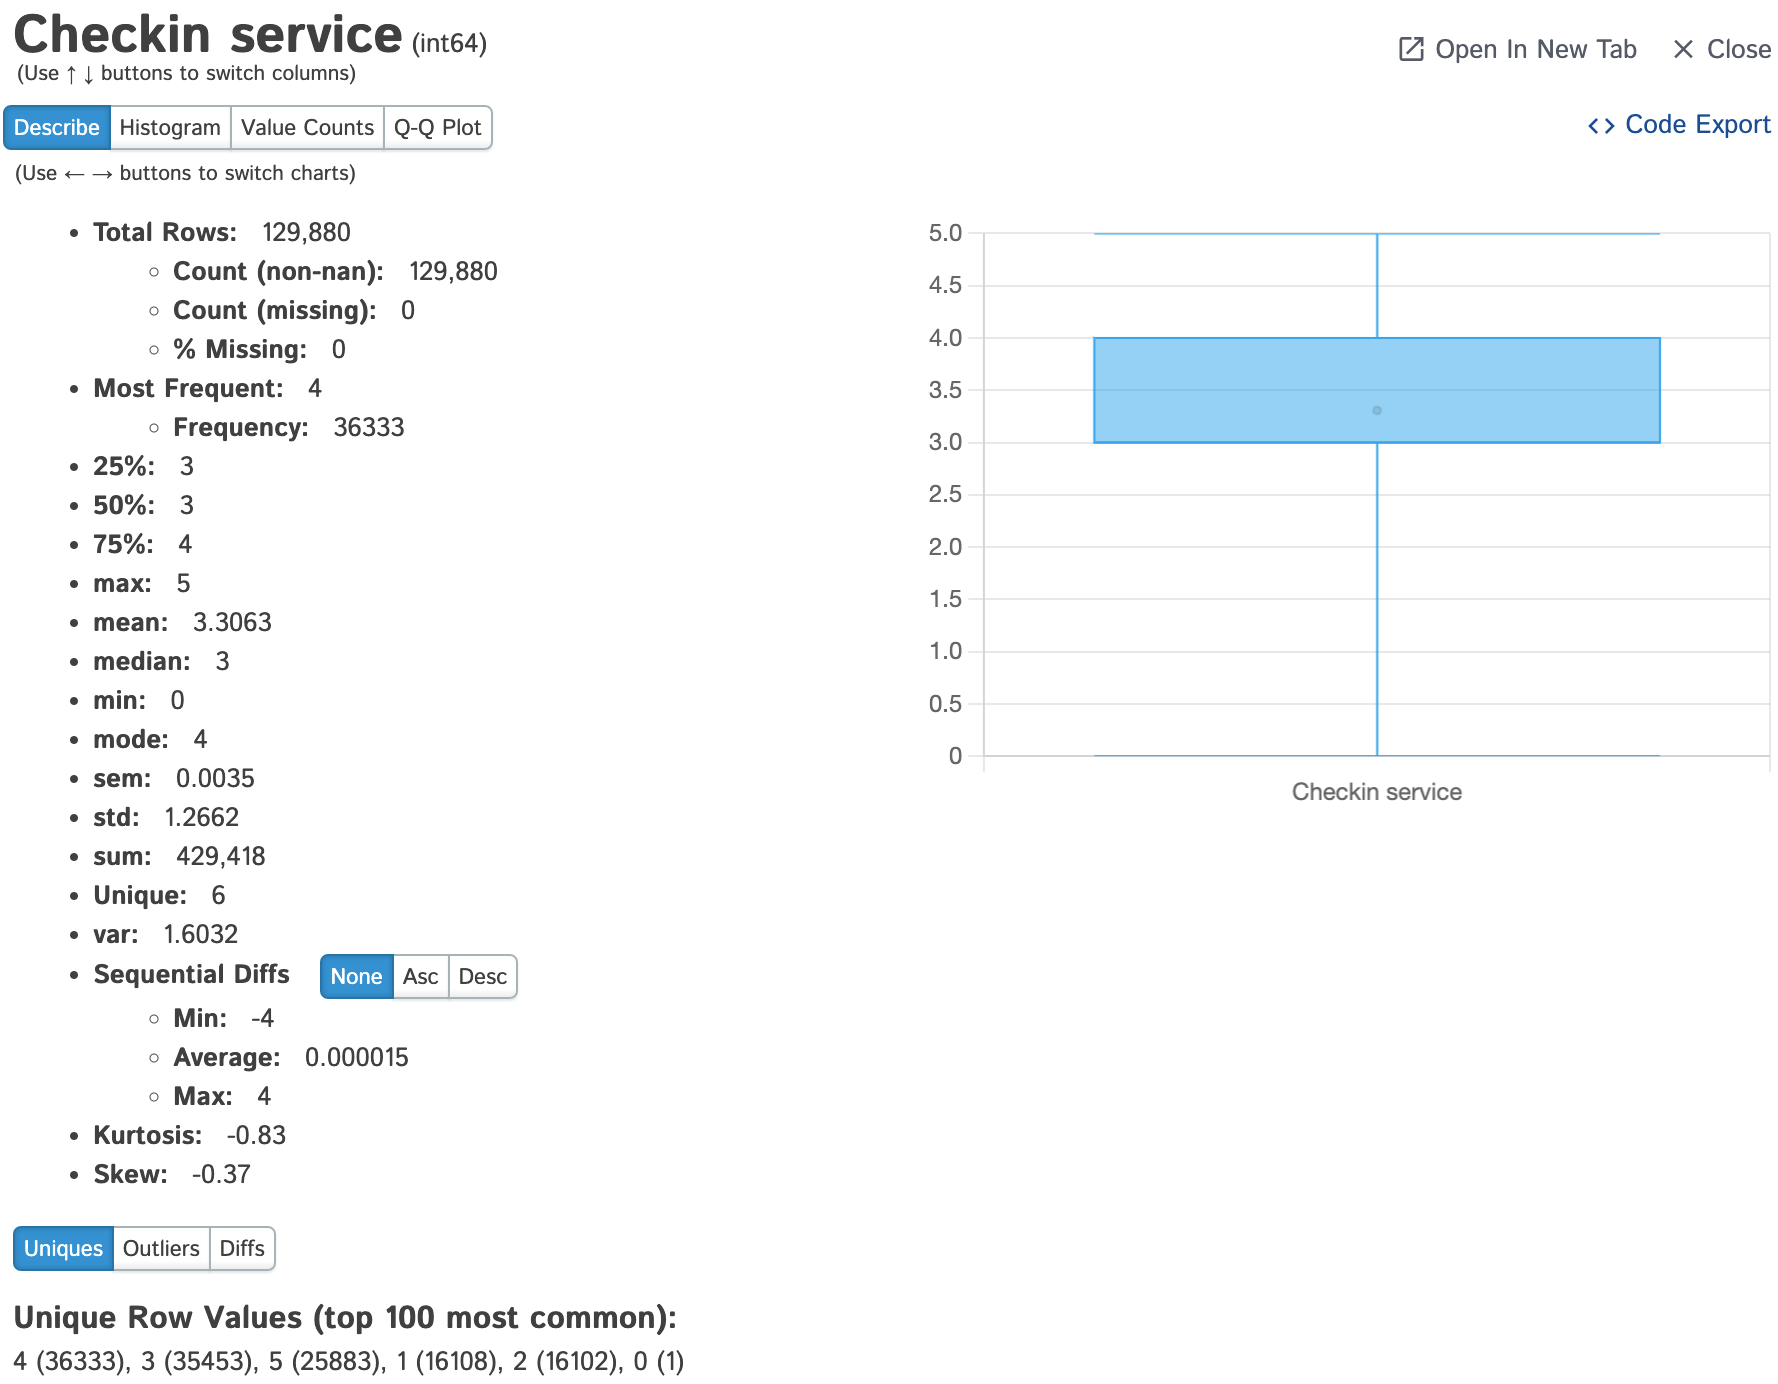

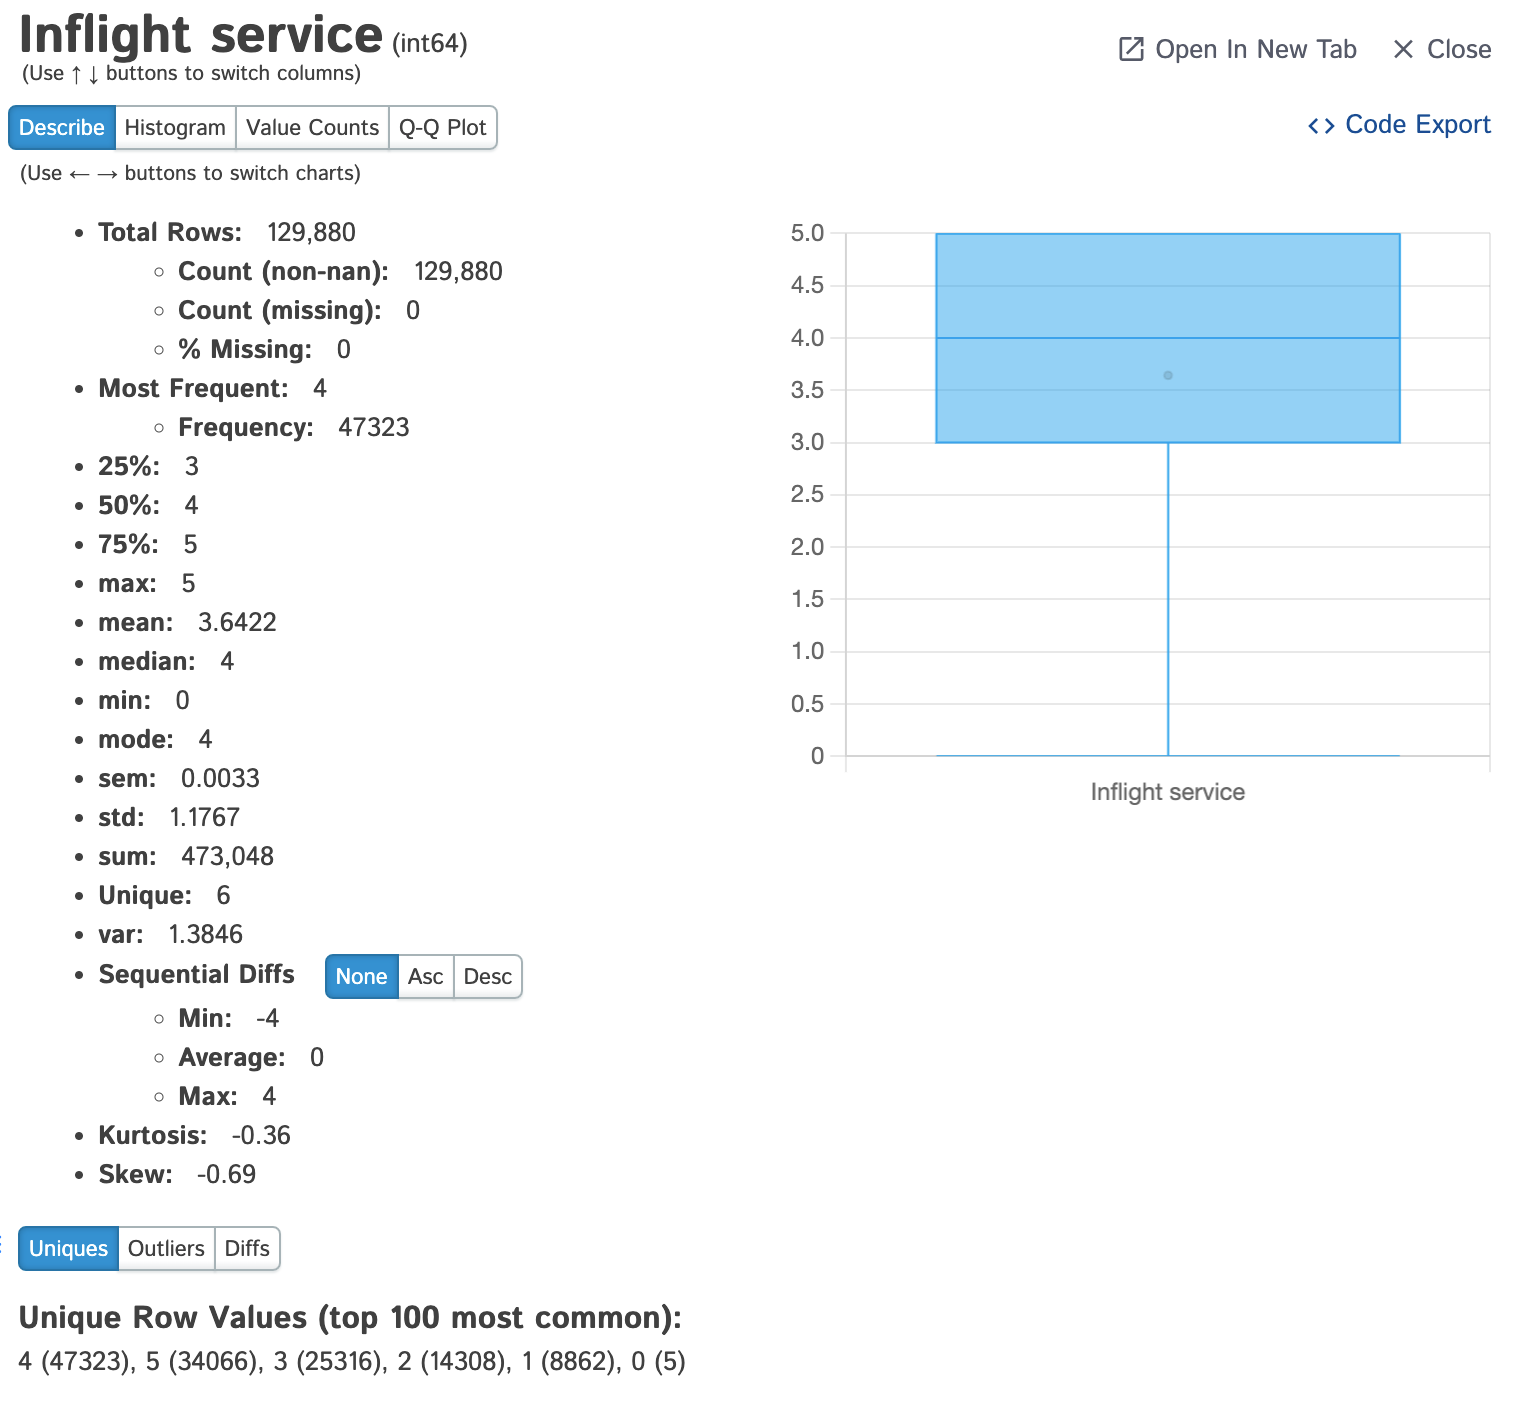

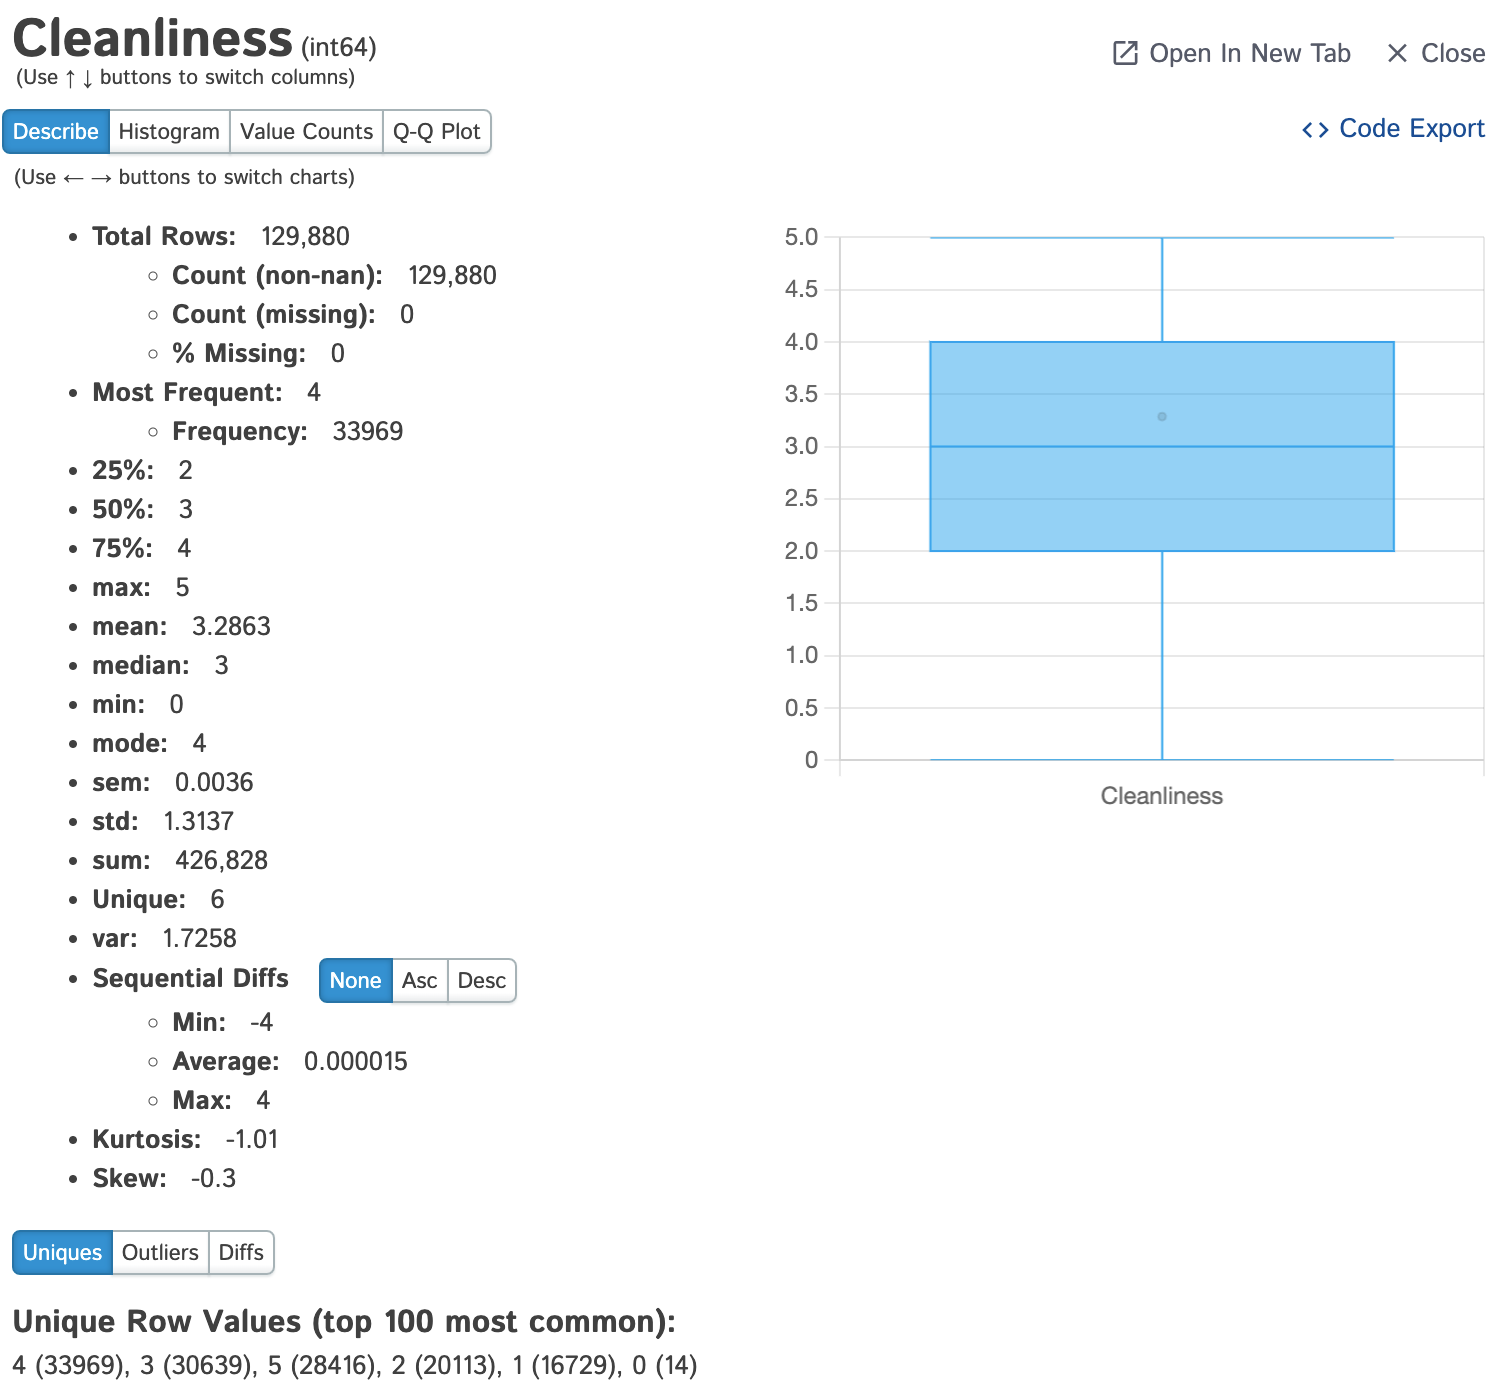

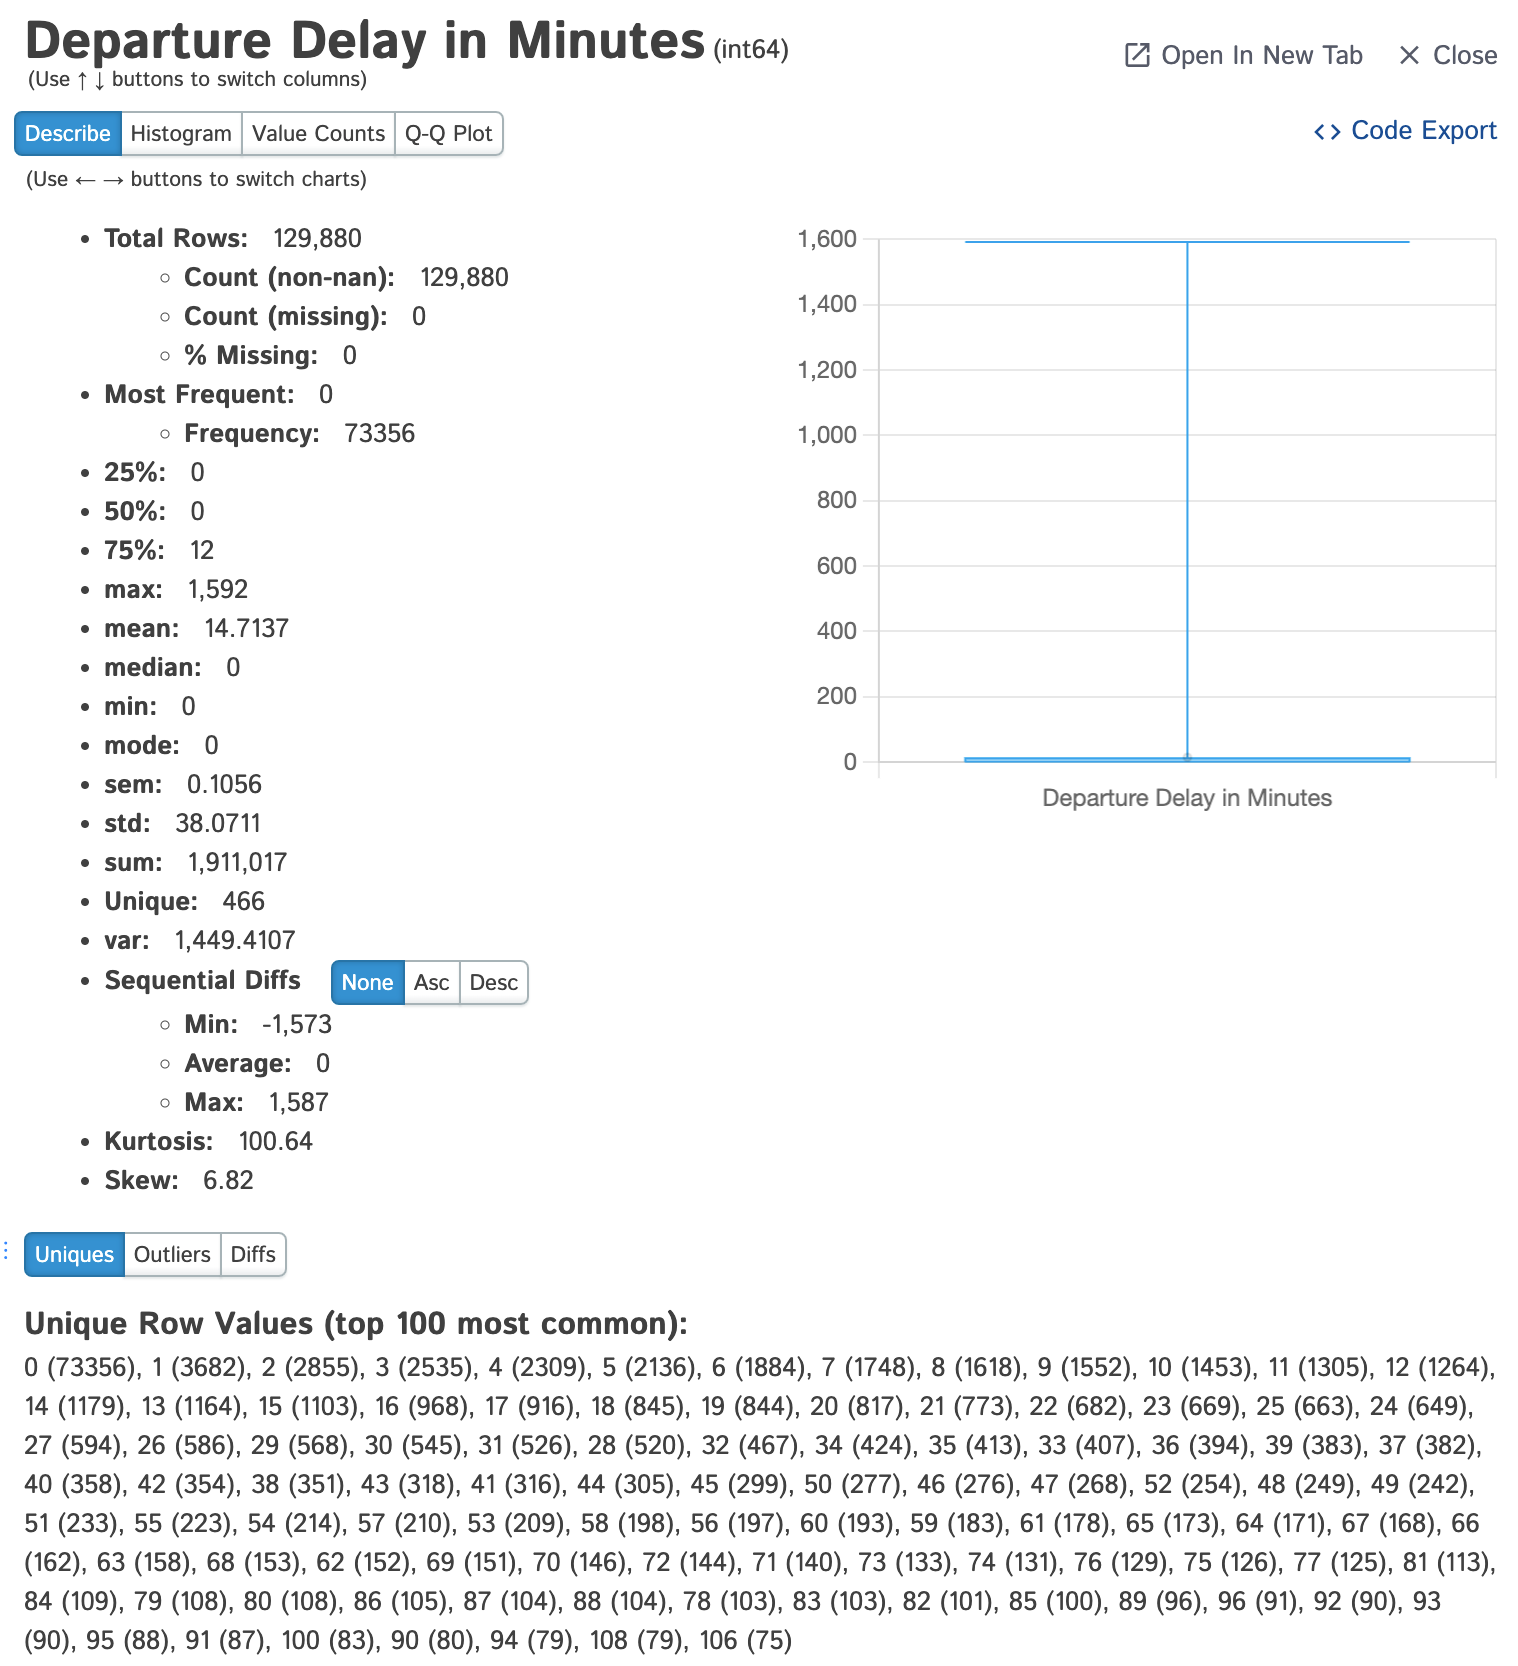

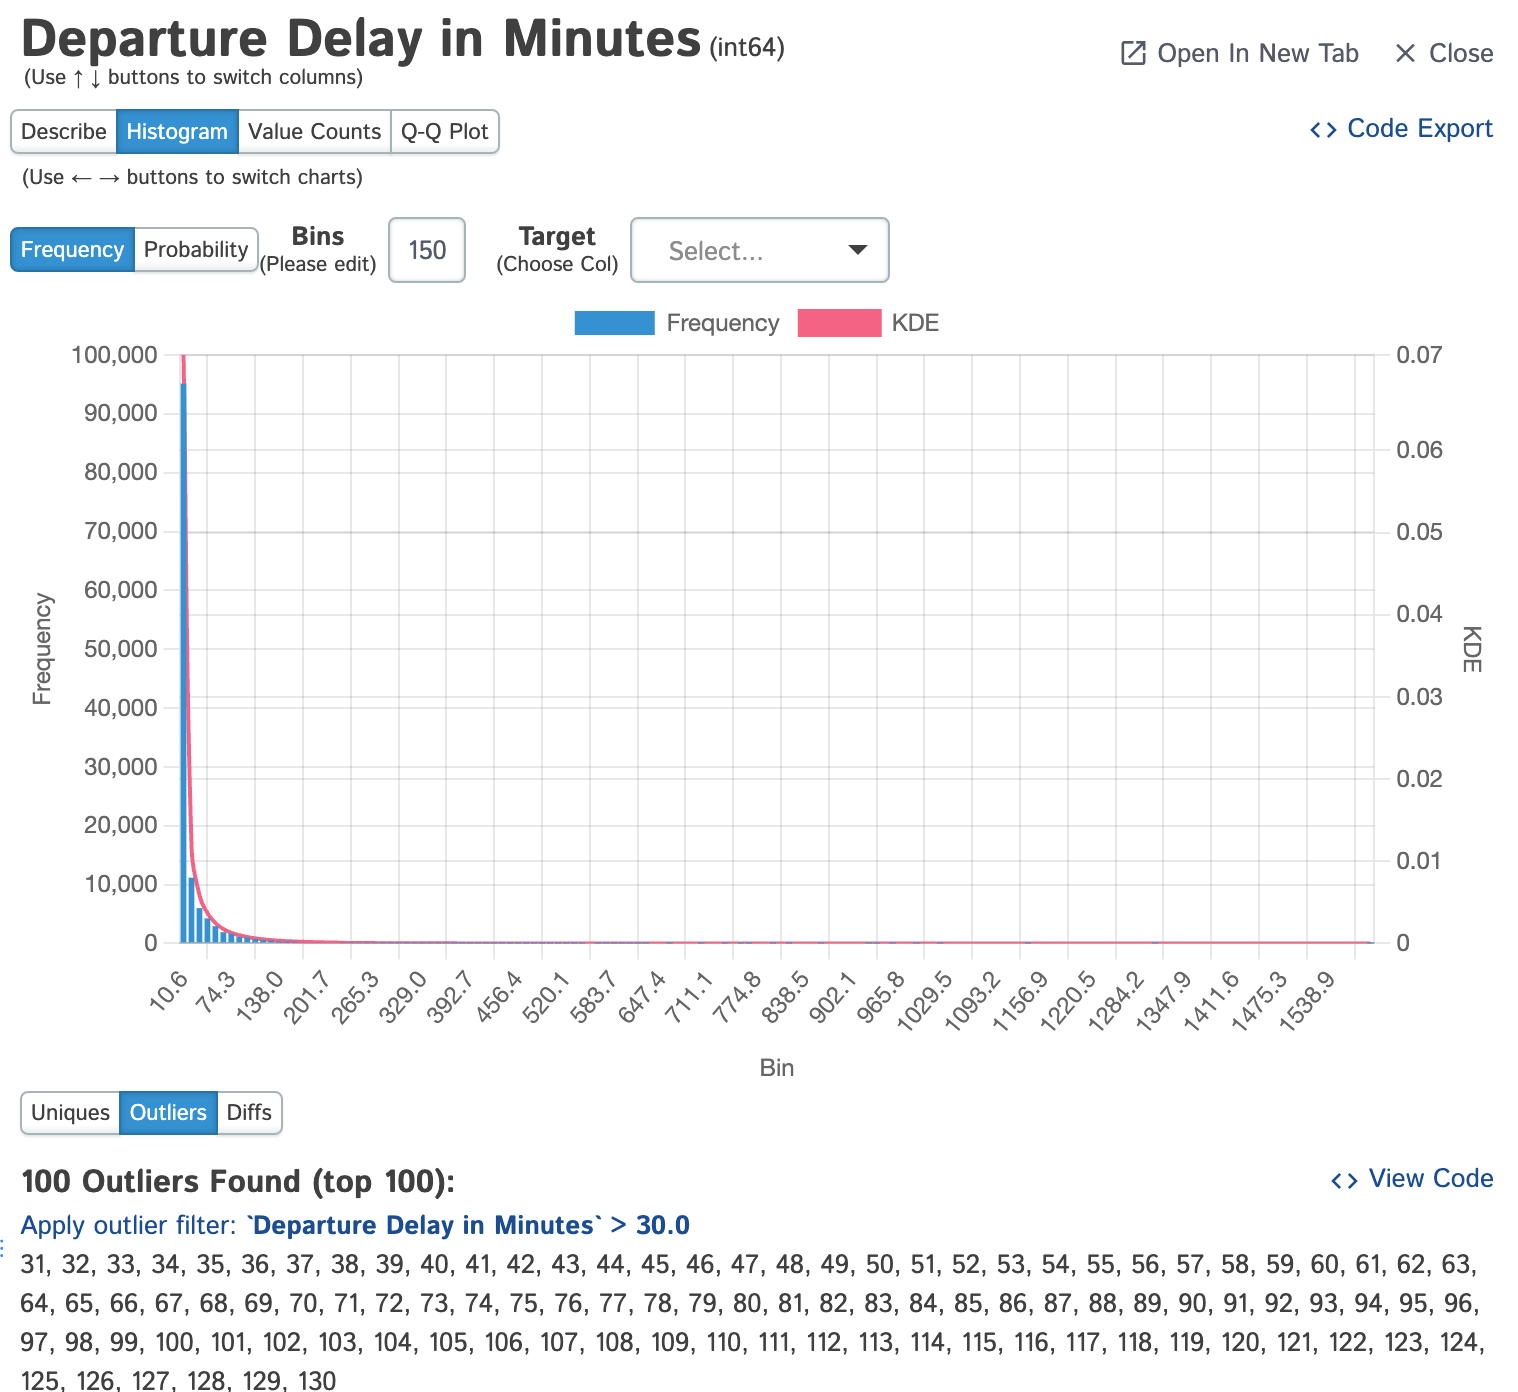

###Correlations###


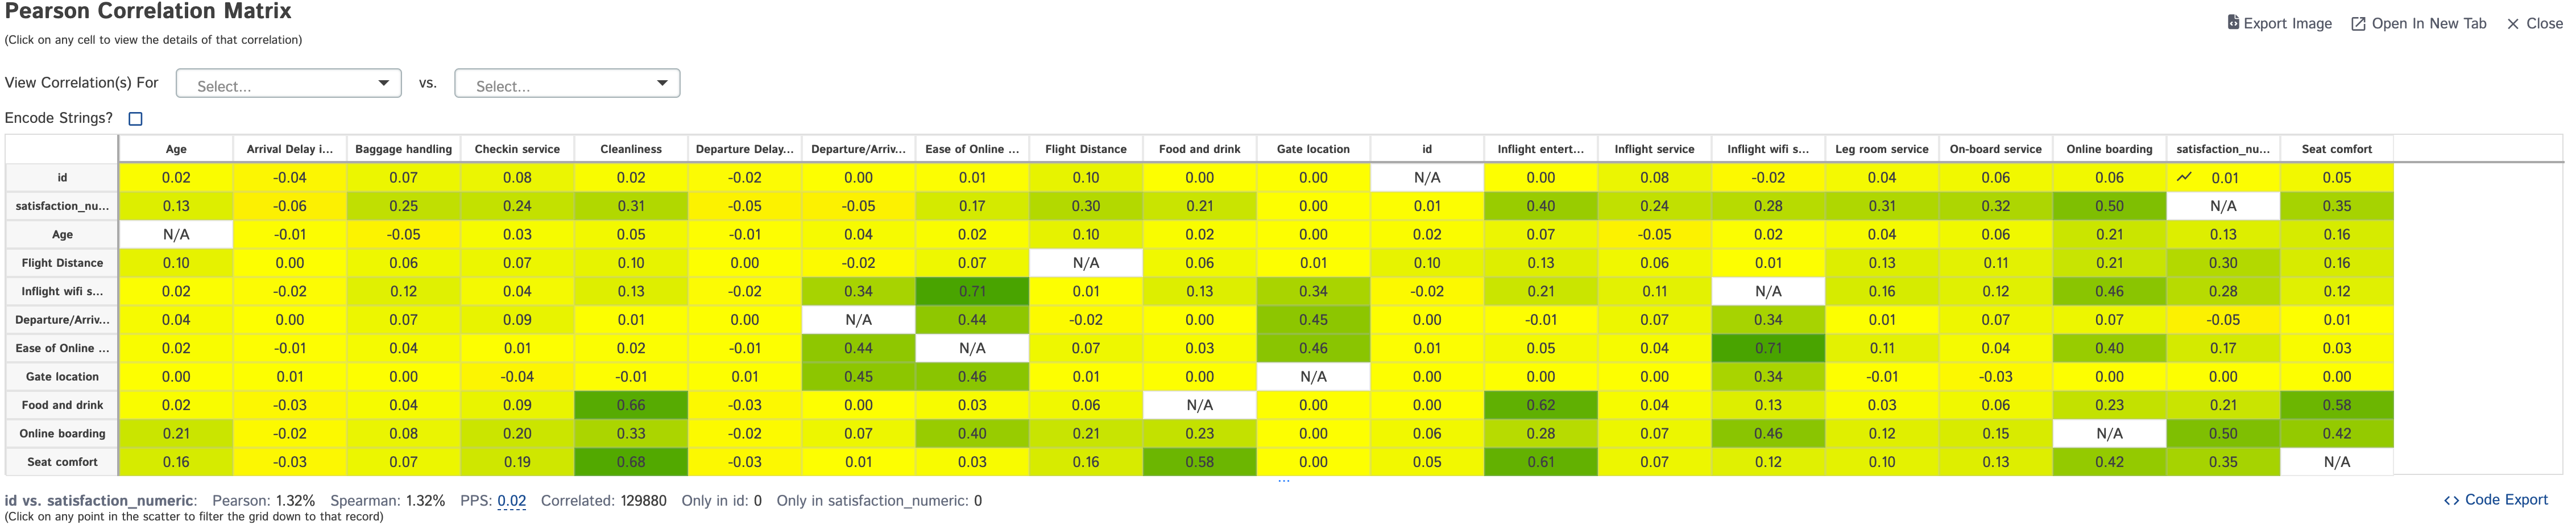

After encoding satisfaction to a 1 or 0 

In [29]:

from sklearn.preprocessing import LabelEncoder
is_nan = df['satisfaction_v2'].isnull()
from sklearn.preprocessing import LabelEncoder
is_nan = df['satisfaction_v2'].isnull()
pd.Series(LabelEncoder().fit_transform(df['satisfaction_v2']), index=df.index).where(~is_nan, 0)


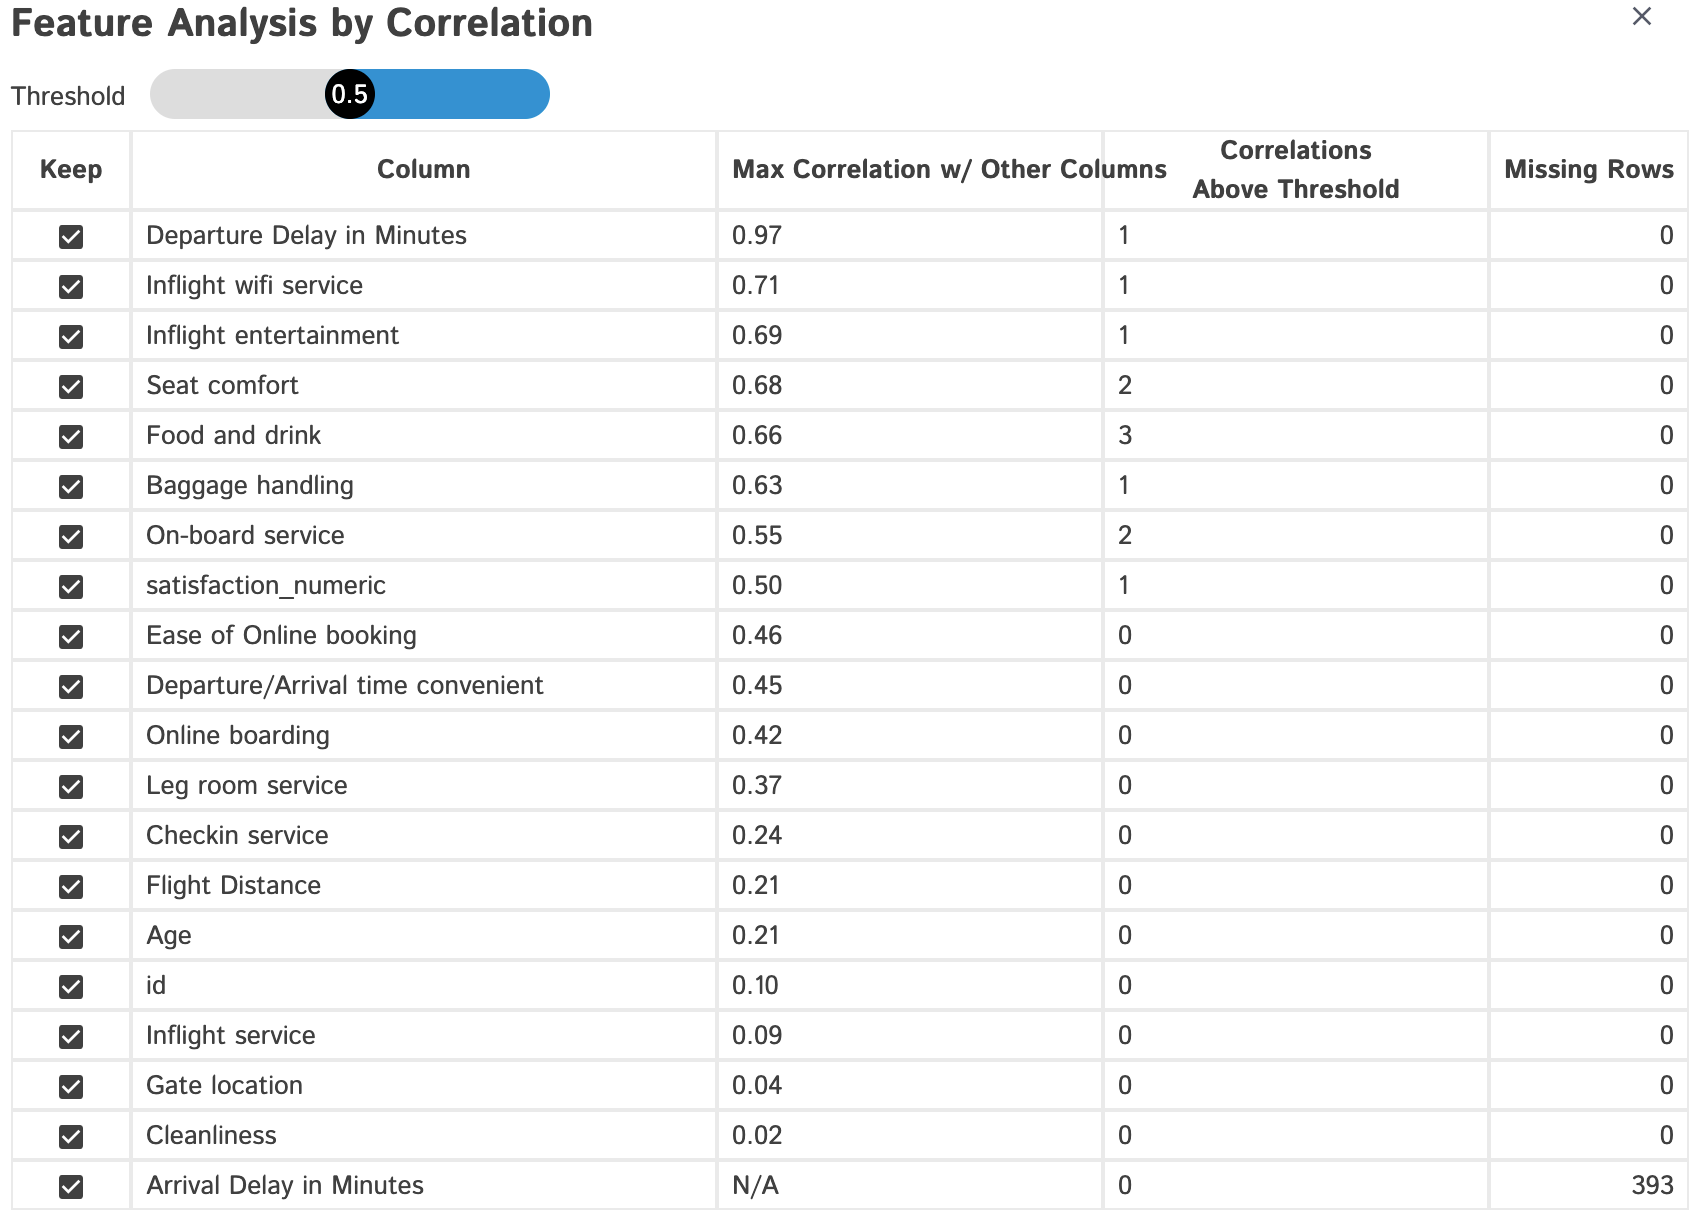

Let's drop the NaNs we saw earlier.

In [27]:
df = df.dropna(subset=['Arrival Delay in Minutes'])

In [29]:
dtale.show(df)

https://xfsy4qyx7mi-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/10